In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# https://iwatobipen.wordpress.com/2020/01/21/make-report-with-rdkit-and-matplotlib-rdkit-memo-chemoinformatics/
# https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from matplotlib.backends.backend_pgf import PdfPages
import os
from PIL import Image
import io
import matplotlib.image as mpimg
import cairosvg
#import shap

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold, KFold
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import PowerTransformer
from scipy.optimize import minimize, least_squares, brute
from scipy import optimize
from scipy.stats import boxcox
import lightgbm as lgb
#import pickle
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from bayes_opt import BayesianOptimization
import lightgbm as lgb
import catboost as cb

In [2]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=2.2, rc={"lines.linewidth": 3.7})

from pylab import *
rc('axes', linewidth=2.5)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df_1 = pd.read_csv('new_list_2.csv')

# Previous dataset

In [6]:
df_ori = pd.read_csv('compound_rejections_2.csv')

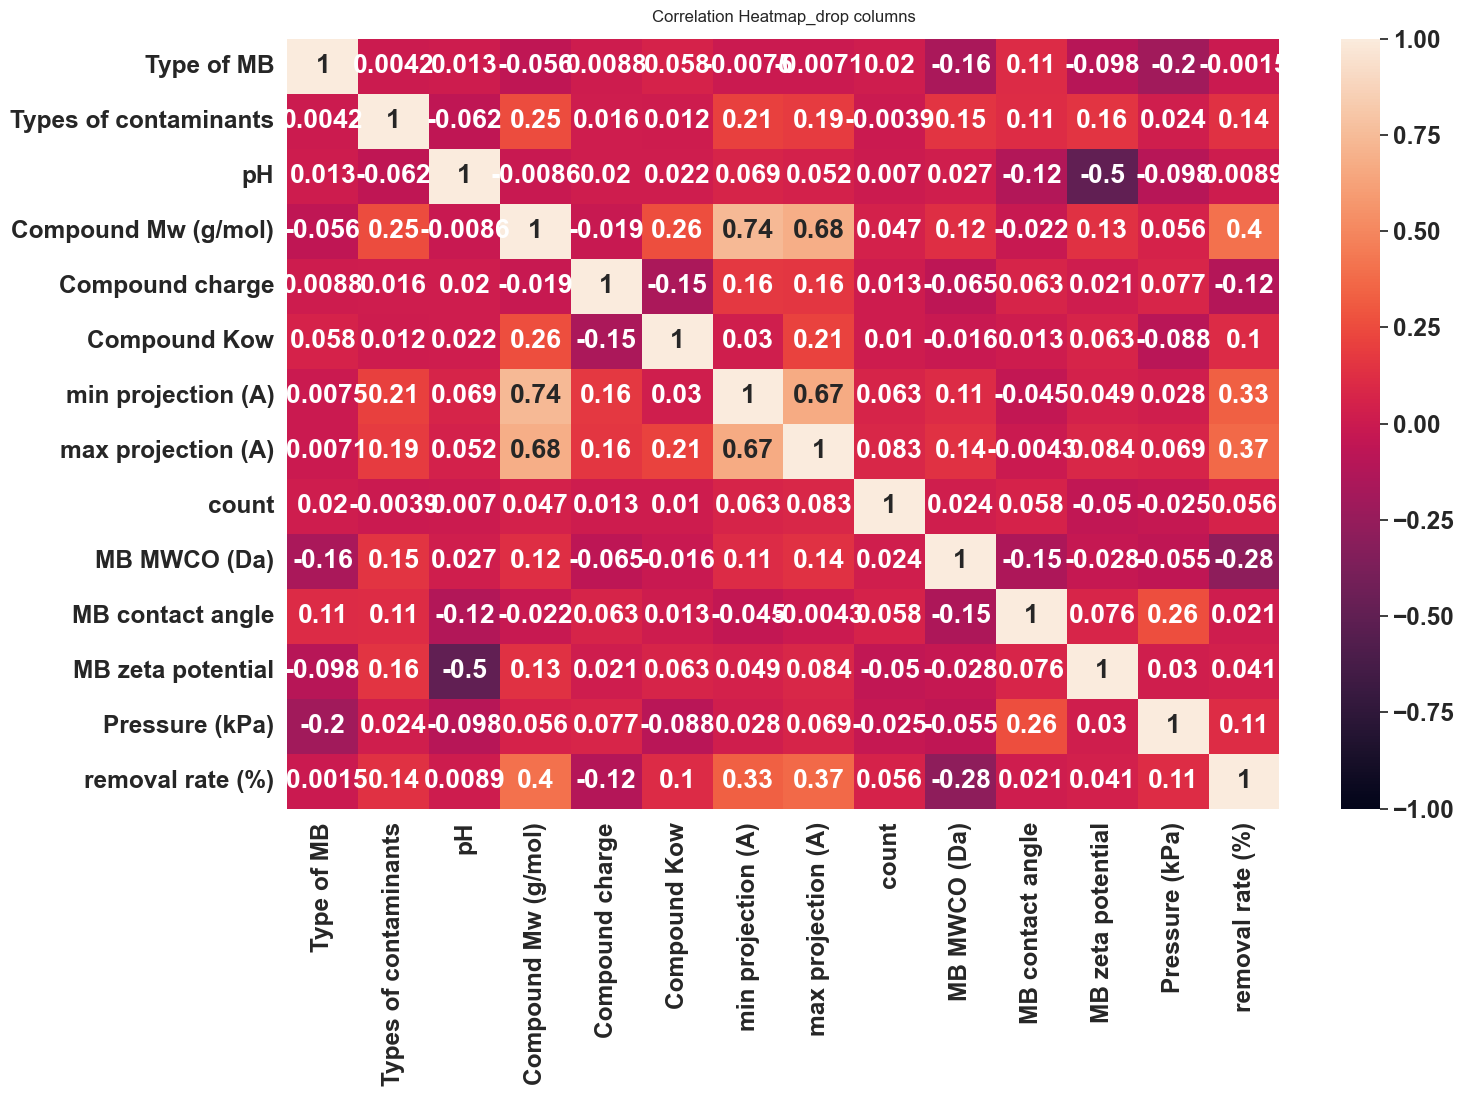

In [7]:
selected_columns = df_ori[['Type of MB', 'Types of contaminants', 'pH', 'Compound Mw (g/mol)', 'Compound charge', 'Compound Kow', 'min projection (A)', 'max projection (A)', 'count', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

In [8]:
y_data = df_ori['removal rate (%)']
x_data = df_ori.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [25]:
power_train = PowerTransformer(standardize=True)
power_val = PowerTransformer(standardize=True)
power_test = PowerTransformer(standardize=True)

y_train_trans = power_train.fit_transform(y_train.values.reshape(-1, 1))
y_val_trans = power_val.fit_transform(y_val.values.reshape(-1, 1))
y_test_trans = power_test.fit_transform(y_test.values.reshape(-1, 1))

In [26]:
le_mem_type0 = LabelEncoder()
le_mem_type1 = LabelEncoder()
le_mem_type2 = LabelEncoder()
x_train.iloc[:,0] = le_mem_type0.fit_transform(x_train.iloc[:,0])
x_val.iloc[:,0] = le_mem_type1.fit_transform(x_val.iloc[:,0])
x_test.iloc[:,0] = le_mem_type2.fit_transform(x_test.iloc[:,0])

le_con_type0 = LabelEncoder()
le_con_type1 = LabelEncoder()
le_con_type2 = LabelEncoder()
x_train.iloc[:,1] = le_mem_type0.fit_transform(x_train.iloc[:,1])
x_val.iloc[:,1] = le_mem_type1.fit_transform(x_val.iloc[:,1])
x_test.iloc[:,1] = le_mem_type2.fit_transform(x_test.iloc[:,1])

scaler_mem_type0 = preprocessing.MinMaxScaler()
scaler_con_type0 = preprocessing.MinMaxScaler()
scaler_pH0 = preprocessing.MinMaxScaler()
scaler_MW0 = preprocessing.MinMaxScaler()
scaler_char0 = preprocessing.MinMaxScaler()
scaler_Kow0 = preprocessing.MinMaxScaler()
scaler_min0 = preprocessing.MinMaxScaler()
scaler_max0 = preprocessing.MinMaxScaler()
scaler_cnt0 = preprocessing.MinMaxScaler()
scaler_MWCO0 = preprocessing.MinMaxScaler()
scaler_CA0 = preprocessing.MinMaxScaler()
scaler_zeta0 = preprocessing.MinMaxScaler()
scaler_total0 = preprocessing.MinMaxScaler()
scaler_kPa0 = preprocessing.MinMaxScaler()
scaler_time0 = preprocessing.MinMaxScaler()
scaler_conc0 = preprocessing.MinMaxScaler()
scaler_removal0 = preprocessing.MinMaxScaler()

scaler_mem_type1 = preprocessing.MinMaxScaler()
scaler_con_type1 = preprocessing.MinMaxScaler()
scaler_pH1 = preprocessing.MinMaxScaler()
scaler_MW1 = preprocessing.MinMaxScaler()
scaler_char1 = preprocessing.MinMaxScaler()
scaler_Kow1 = preprocessing.MinMaxScaler()
scaler_min1 = preprocessing.MinMaxScaler()
scaler_max1 = preprocessing.MinMaxScaler()
scaler_cnt1 = preprocessing.MinMaxScaler()
scaler_MWCO1 = preprocessing.MinMaxScaler()
scaler_CA1 = preprocessing.MinMaxScaler()
scaler_zeta1 = preprocessing.MinMaxScaler()
scaler_total1 = preprocessing.MinMaxScaler()
scaler_kPa1 = preprocessing.MinMaxScaler()
scaler_time1 = preprocessing.MinMaxScaler()
scaler_conc1 = preprocessing.MinMaxScaler()
scaler_removal1 = preprocessing.MinMaxScaler()

scaler_mem_type2 = preprocessing.MinMaxScaler()
scaler_con_type2 = preprocessing.MinMaxScaler()
scaler_pH2 = preprocessing.MinMaxScaler()
scaler_MW2 = preprocessing.MinMaxScaler()
scaler_char2 = preprocessing.MinMaxScaler()
scaler_Kow2 = preprocessing.MinMaxScaler()
scaler_min2 = preprocessing.MinMaxScaler()
scaler_max2 = preprocessing.MinMaxScaler()
scaler_cnt2 = preprocessing.MinMaxScaler()
scaler_MWCO2 = preprocessing.MinMaxScaler()
scaler_CA2 = preprocessing.MinMaxScaler()
scaler_zeta2 = preprocessing.MinMaxScaler()
scaler_total2 = preprocessing.MinMaxScaler()
scaler_kPa2 = preprocessing.MinMaxScaler()
scaler_time2 = preprocessing.MinMaxScaler()
scaler_conc2 = preprocessing.MinMaxScaler()
scaler_removal2 = preprocessing.MinMaxScaler()

In [27]:
temp_0 = scaler_mem_type0.fit_transform(x_train.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type0.fit_transform(x_train.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH0.fit_transform(x_train.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO0.fit_transform(x_train.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA0.fit_transform(x_train.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta0.fit_transform(x_train.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa0.fit_transform(x_train.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal0.fit_transform(y_train_trans)

temp_8 = scaler_MW0.fit_transform(x_train.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char0.fit_transform(x_train.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow0.fit_transform(x_train.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min0.fit_transform(x_train.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max0.fit_transform(x_train.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt0.fit_transform(x_train.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total0.fit_transform(x_train.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time0.fit_transform(x_train.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc0.fit_transform(x_train.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_train_scaled = pd.DataFrame()
y_train_scaled = pd.DataFrame()

x_train_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_train_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_train_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_train_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_train_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_train_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_train_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_train_scaled = temp_7.reshape(1,-1).tolist()[0]

x_train_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_train_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_train_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_train_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_train_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_train_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_train_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_train_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_train_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [30]:
temp_0 = scaler_mem_type1.fit_transform(x_val.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type1.fit_transform(x_val.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH1.fit_transform(x_val.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO1.fit_transform(x_val.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA1.fit_transform(x_val.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta1.fit_transform(x_val.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa1.fit_transform(x_val.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal1.fit_transform(y_val_trans)

temp_8 = scaler_MW1.fit_transform(x_val.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char1.fit_transform(x_val.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow1.fit_transform(x_val.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min1.fit_transform(x_val.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max1.fit_transform(x_val.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt1.fit_transform(x_val.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total1.fit_transform(x_val.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time1.fit_transform(x_val.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc1.fit_transform(x_val.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_val_scaled = pd.DataFrame()
y_val_scaled = pd.DataFrame()

x_val_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_val_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_val_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_val_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_val_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_val_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_val_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_val_scaled = temp_7.reshape(1,-1).tolist()[0]

x_val_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_val_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_val_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_val_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_val_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_val_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_val_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_val_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_val_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [33]:
temp_0 = scaler_mem_type2.fit_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type2.fit_transform(x_test.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH2.fit_transform(x_test.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO2.fit_transform(x_test.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA2.fit_transform(x_test.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta2.fit_transform(x_test.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa2.fit_transform(x_test.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal2.fit_transform(y_test_trans)

temp_8 = scaler_MW2.fit_transform(x_test.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char2.fit_transform(x_test.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow2.fit_transform(x_test.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min2.fit_transform(x_test.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max2.fit_transform(x_test.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt2.fit_transform(x_test.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total2.fit_transform(x_test.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time2.fit_transform(x_test.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc2.fit_transform(x_test.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_test_scaled = pd.DataFrame()
y_test_scaled = pd.DataFrame()

x_test_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_test_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_test_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_test_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_test_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_test_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_test_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_test_scaled = temp_7.reshape(1,-1).tolist()[0]

x_test_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_test_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_test_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_test_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_test_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_test_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_test_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_test_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_test_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [37]:
# Linear regression
reg_LR = LinearRegression()
reg_LR.fit(x_train_scaled, y_train_scaled)
#reg_LR.predict(x_test_scaled, y_test_scaled)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Build a model

In [38]:
# Rdkit 2048 (path length 7)
#df_2 = pd.read_csv('df_fin_2048.csv')
df_2 = pd.read_csv('df_fin_path_32768_3_fin.csv')
#df_2 = pd.read_csv('df_fin_path_1024_1_fin.csv')
#df_2 = pd.read_csv('df_fin_path_2048_7_short.csv')

In [24]:
# Morgan 2048 (radius 7)
#df_2 = pd.read_csv('df_fin_morgan_4096_1_fin.csv')
df_2 = pd.read_csv('df_fin_morgan_16384_3_fin.csv')

In [42]:
# PubChem 881
df_2 = pd.read_csv('df_fin_PubChem_new.csv')

In [128]:
# MACCS 166
#df_2 = pd.read_csv('df_fin_MACCS.csv')
df_2 = pd.read_csv('df_fin_MACCS_new.csv')

In [129]:
df_2.drop(labels=['Types of contaminants'], axis=1, inplace=True)

In [130]:
y_data = df_2['removal rate (%)']
x_data = df_2.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [131]:
# stratified splits
mini = np.amin(y_data)
maxi = np.amax(y_data)
bins = np.linspace(start=mini, stop=maxi, num=10)
y_binned = np.digitize(y_data, bins, right=True)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=6, stratify=y_binned)

# mini = np.amin(y_train)
# maxi = np.amax(y_train)
# bins = np.linspace(start=mini, stop=maxi, num=10)
# y_binned = np.digitize(y_train, bins, right=True)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=6, stratify=y_binned)

In [132]:
# normal splits
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [133]:
# y_train_trans = y_train/100
# y_val_trans = y_val/100
# y_test_trans = y_test/100

In [134]:
y_train_trans = y_train/100
y_train_trans = -np.sqrt(1-y_train_trans)

# y_val_trans = y_val/100
# y_val_trans = -np.sqrt(1-y_val_trans)

y_test_trans = y_test/100
y_test_trans = -np.sqrt(1-y_test_trans)

(array([ 3.,  2.,  1.,  2.,  4.,  2.,  1.,  6.,  2.,  2.,  1.,  5.,  2.,
         1.,  3.,  1.,  2.,  4.,  0.,  0.,  2.,  3.,  0.,  3.,  1.,  6.,
         1.,  1.,  0.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  1.,  3.,  2.,
         0.,  2.,  0.,  2.,  2.,  4.,  3.,  5.,  2.,  5.,  2.,  2.,  4.,
         1.,  9.,  2.,  2.,  7.,  4.,  8.,  3.,  1.,  5.,  2.,  7.,  3.,
         3.,  5.,  5.,  7.,  5.,  9.,  3.,  3.,  8.,  8.,  7.,  5., 15.,
         6., 14.,  5.,  5.,  8.,  6.,  5.,  7.,  5.,  6.,  3.,  6., 10.,
         3.,  7.,  3.,  3.,  3.,  4.,  2.,  1., 19.]),
 array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
        -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
        -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
        -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
        -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
        -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
        

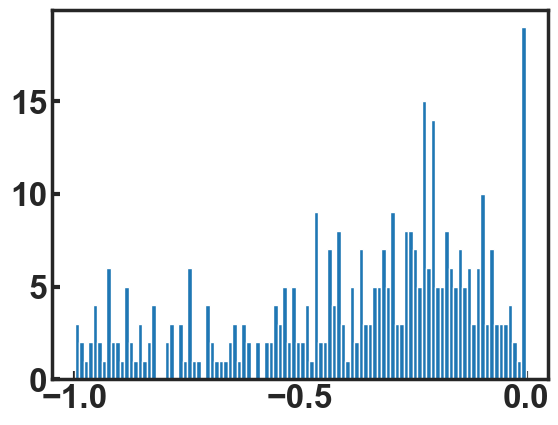

In [135]:
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(b.values.reshape(-1,1))
#temp = scaler.transform(b.values.reshape(-1,1))
plt.hist(y_test_trans, bins=100)

In [136]:
print(y_train_trans.agg(['skew', 'kurtosis']).transpose())
# print(y_val_trans.agg(['skew', 'kurtosis']).transpose())
print(y_test_trans.agg(['skew', 'kurtosis']).transpose())

skew       -0.755673
kurtosis   -0.437802
Name: removal rate (%), dtype: float64
skew       -0.705561
kurtosis   -0.516505
Name: removal rate (%), dtype: float64


In [137]:
y_train_trans = y_train_trans.values.reshape(-1, 1)
# y_val_trans = y_val_trans.values.reshape(-1, 1)
y_test_trans = y_test_trans.values.reshape(-1, 1)

In [138]:
le_mem_type0 = LabelEncoder()
le_mem_type1 = LabelEncoder()
le_mem_type2 = LabelEncoder()
x_train.iloc[:,0] = le_mem_type0.fit_transform(x_train.iloc[:,0])
# x_val.iloc[:,0] = le_mem_type1.fit_transform(x_val.iloc[:,0])
x_test.iloc[:,0] = le_mem_type2.fit_transform(x_test.iloc[:,0])

scaler_mem_type0 = preprocessing.MinMaxScaler()
scaler_con_type0 = preprocessing.MinMaxScaler()
scaler_pH0 = preprocessing.MinMaxScaler()
scaler_MW0 = preprocessing.MinMaxScaler()
scaler_char0 = preprocessing.MinMaxScaler()
scaler_Kow0 = preprocessing.MinMaxScaler()
scaler_min0 = preprocessing.MinMaxScaler()
scaler_max0 = preprocessing.MinMaxScaler()
scaler_cnt0 = preprocessing.MinMaxScaler()
scaler_MWCO0 = preprocessing.MinMaxScaler()
scaler_CA0 = preprocessing.MinMaxScaler()
scaler_zeta0 = preprocessing.MinMaxScaler()
scaler_total0 = preprocessing.MinMaxScaler()
scaler_kPa0 = preprocessing.MinMaxScaler()
scaler_time0 = preprocessing.MinMaxScaler()
scaler_conc0 = preprocessing.MinMaxScaler()
scaler_removal0 = preprocessing.MinMaxScaler()

scaler_mem_type1 = preprocessing.MinMaxScaler()
scaler_con_type1 = preprocessing.MinMaxScaler()
scaler_pH1 = preprocessing.MinMaxScaler()
scaler_MW1 = preprocessing.MinMaxScaler()
scaler_char1 = preprocessing.MinMaxScaler()
scaler_Kow1 = preprocessing.MinMaxScaler()
scaler_min1 = preprocessing.MinMaxScaler()
scaler_max1 = preprocessing.MinMaxScaler()
scaler_cnt1 = preprocessing.MinMaxScaler()
scaler_MWCO1 = preprocessing.MinMaxScaler()
scaler_CA1 = preprocessing.MinMaxScaler()
scaler_zeta1 = preprocessing.MinMaxScaler()
scaler_total1 = preprocessing.MinMaxScaler()
scaler_kPa1 = preprocessing.MinMaxScaler()
scaler_time1 = preprocessing.MinMaxScaler()
scaler_conc1 = preprocessing.MinMaxScaler()
scaler_removal1 = preprocessing.MinMaxScaler()

scaler_mem_type2 = preprocessing.MinMaxScaler()
scaler_con_type2 = preprocessing.MinMaxScaler()
scaler_pH2 = preprocessing.MinMaxScaler()
scaler_MW2 = preprocessing.MinMaxScaler()
scaler_char2 = preprocessing.MinMaxScaler()
scaler_Kow2 = preprocessing.MinMaxScaler()
scaler_min2 = preprocessing.MinMaxScaler()
scaler_max2 = preprocessing.MinMaxScaler()
scaler_cnt2 = preprocessing.MinMaxScaler()
scaler_MWCO2 = preprocessing.MinMaxScaler()
scaler_CA2 = preprocessing.MinMaxScaler()
scaler_zeta2 = preprocessing.MinMaxScaler()
scaler_total2 = preprocessing.MinMaxScaler()
scaler_kPa2 = preprocessing.MinMaxScaler()
scaler_time2 = preprocessing.MinMaxScaler()
scaler_conc2 = preprocessing.MinMaxScaler()
scaler_removal2 = preprocessing.MinMaxScaler()

In [139]:
temp_0 = scaler_mem_type0.fit_transform(x_train.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
temp_2 = scaler_pH0.fit_transform(x_train.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO0.fit_transform(x_train.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA0.fit_transform(x_train.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa0.fit_transform(x_train.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_conc0.fit_transform(x_train.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_8 = scaler_removal0.fit_transform(y_train_trans)

x_train_scaled = pd.DataFrame()
y_train_scaled = pd.DataFrame()

x_train_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_train_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_train_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_train_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_train_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
x_train_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_train_scaled = temp_8.reshape(1,-1).tolist()[0]

In [140]:
# temp_0 = scaler_mem_type1.fit_transform(x_val.loc[:,'Type of MB'].values.reshape(-1,1))
# # scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# # temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_2 = scaler_pH1.fit_transform(x_val.loc[:,'pH'].values.reshape(-1,1))
# temp_3 = scaler_MWCO1.fit_transform(x_val.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
# temp_4 = scaler_CA1.fit_transform(x_val.loc[:,'MB contact angle'].values.reshape(-1,1))
# # scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# # temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_6 = scaler_kPa1.fit_transform(x_val.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# temp_7 = scaler_conc1.fit_transform(x_val.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
# temp_8 = scaler_removal1.fit_transform(y_val_trans)

# x_val_scaled = pd.DataFrame()
# y_val_scaled = pd.DataFrame()

# x_val_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# # x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
# x_val_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
# x_val_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
# x_val_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
# #x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
# x_val_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
# x_val_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
# #y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
# y_val_scaled = temp_8.reshape(1,-1).tolist()[0]

In [141]:
temp_0 = scaler_mem_type2.fit_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
temp_2 = scaler_pH2.fit_transform(x_test.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO2.fit_transform(x_test.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA2.fit_transform(x_test.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa2.fit_transform(x_test.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_conc2.fit_transform(x_test.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_8 = scaler_removal2.fit_transform(y_test_trans)

x_test_scaled = pd.DataFrame()
y_test_scaled = pd.DataFrame()

x_test_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_test_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_test_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_test_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_test_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
x_test_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_test_scaled = temp_8.reshape(1,-1).tolist()[0]

In [142]:
x_train.reset_index(drop=True, inplace=True)
# x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [143]:
x_train_scaled = pd.concat([x_train_scaled, x_train.iloc[:, 7:]], axis=1)
# x_val_scaled = pd.concat([x_val_scaled, x_val.iloc[:, 7:]], axis=1)
x_test_scaled = pd.concat([x_test_scaled, x_test.iloc[:, 7:]], axis=1)

(array([ 3.,  2.,  1.,  2.,  4.,  2.,  1.,  6.,  2.,  2.,  1.,  5.,  2.,
         1.,  3.,  1.,  2.,  4.,  0.,  1.,  1.,  3.,  0.,  3.,  1.,  6.,
         1.,  1.,  0.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  1.,  3.,  2.,
         0.,  2.,  0.,  2.,  2.,  4.,  3.,  5.,  2.,  5.,  2.,  2.,  4.,
         1.,  9.,  2.,  2.,  7.,  4.,  8.,  3.,  1.,  5.,  2.,  7.,  3.,
         3.,  5.,  5.,  7.,  5.,  9.,  3.,  3.,  8.,  8.,  7.,  5., 15.,
         6., 14.,  5.,  5.,  8.,  6.,  5.,  7.,  5.,  6.,  3.,  6., 10.,
         3.,  7.,  3.,  3.,  3.,  4.,  2.,  1., 19.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

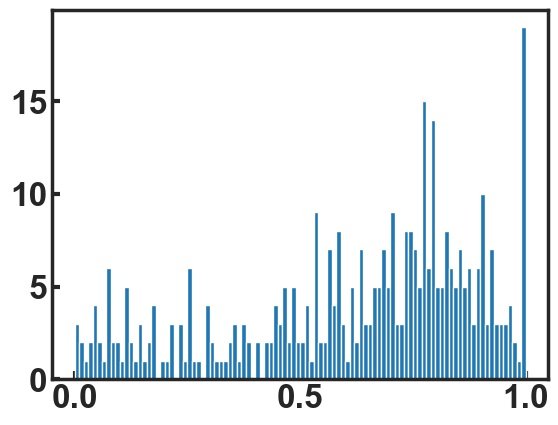

In [144]:
plt.hist(y_test_scaled, bins=100)

In [59]:
reg_LR = SGDRegressor()
param_grid_LR = {'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet', None],
              'alpha': np.linspace(0.1, 1e-8, 50),
              'epsilon': np.linspace(0.1, 1e-8, 50),
              'l1_ratio': [1, 0.7, 0.5, 0.2, 0],
              'eta0': np.linspace(0.1, 1e-8, 50)
              }
random_cv_LR = RandomizedSearchCV(reg_LR, param_grid_LR, cv=7, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_LR = random_cv_LR.fit(x_train_scaled, y_train_scaled)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [60]:
print(search_LR.best_params_)
print(search_LR.score(x_train_scaled, y_train_scaled))

{'penalty': None, 'loss': 'huber', 'l1_ratio': 0.7, 'eta0': 0.07551020653061224, 'epsilon': 0.08367347102040817, 'alpha': 0.07142857428571428}
0.5418632606205815


0.03273882428071391
0.04200526984758577
0.5418632606205815
0.43367972741187233


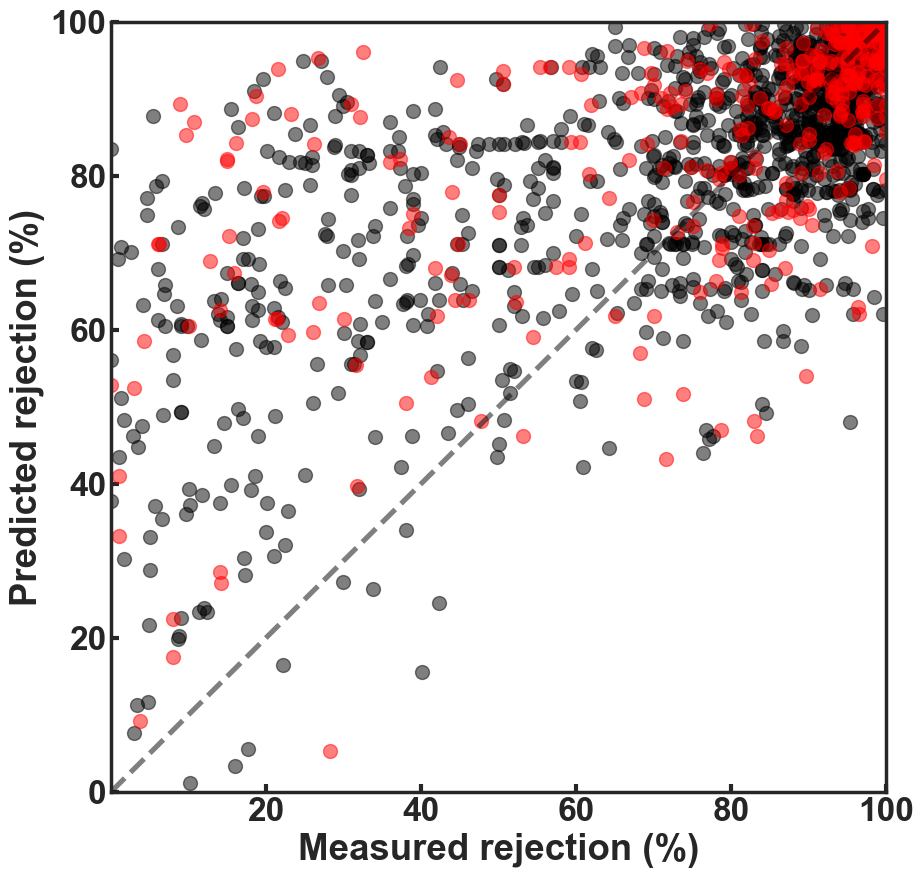

In [61]:
pred_train_LR = search_LR.predict(x_train_scaled)
pred_test_LR = search_LR.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_LR))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_LR))
print(r2_score(y_train_scaled, pred_train_LR))
print(r2_score(y_test_scaled, pred_test_LR))

pred_train_LR_inverse = scaler_removal0.inverse_transform(pred_train_LR.reshape(1,-1))
pred_test_LR_inverse = scaler_removal2.inverse_transform(pred_test_LR.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_LR_real_scale = (1-(-pred_train_LR_inverse)**2)*100
pred_test_LR_real_scale = (1-(-pred_test_LR_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_LR_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_LR_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [62]:
reg_SVM = SVR()
param_grid_SVM = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
                  'C' : np.linspace(1e-2, 20, 20),
                  'degree' : np.arange(0, 20, 2),
                  'coef0' : [10, 1, 0.1, 0.01, 1e-3, 1e-4, 1e-5],
                  'gamma' : ('auto','scale')
                 }
random_cv_SVM = RandomizedSearchCV(reg_SVM, param_grid_SVM, cv=7, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_SVM = random_cv_SVM.fit(x_train_scaled, y_train_scaled)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [63]:
print(search_SVM.best_params_)
print(search_SVM.score(x_train_scaled, y_train_scaled))

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 14, 'coef0': 1e-05, 'C': 3.1663157894736838}
0.6918943899038049


0.0220174776694511
0.03576322935872404
0.6918943899038049
0.5178356936509866


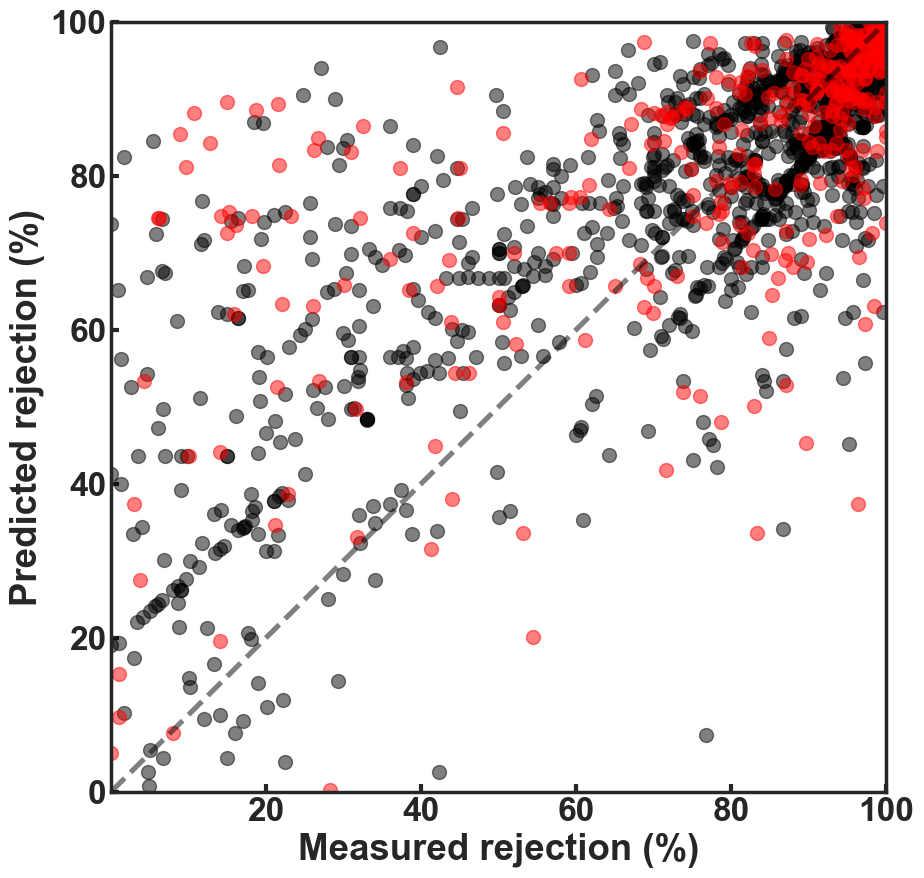

In [64]:
pred_train_SVM = search_SVM.predict(x_train_scaled)
pred_test_SVM = search_SVM.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_SVM))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_SVM))
print(r2_score(y_train_scaled, pred_train_SVM))
print(r2_score(y_test_scaled, pred_test_SVM))

pred_train_SVM_inverse = scaler_removal0.inverse_transform(pred_train_SVM.reshape(1,-1))
pred_test_SVM_inverse = scaler_removal2.inverse_transform(pred_test_SVM.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_SVM_real_scale = (1-(-pred_train_SVM_inverse)**2)*100
pred_test_SVM_real_scale = (1-(-pred_test_SVM_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_SVM_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_SVM_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [91]:
#reg_lgb = lgb.LGBMRegressor(random_state=1, verbose=-1, early_stopping_round=30)
reg_lgb = lgb.LGBMRegressor()

param_grid_lgb = {'max_depth':range(1,50,2),
                  'num_leaves':range(1,20,2),
                  'min_child_weight':range(1,10,2),
                  #'min_child_samples':range(10,200,2),
                  'subsample':np.linspace(0,1,9),
                  'colsample_bytree':np.linspace(0,1,9),
                  'n_estimators':[10, 50, 100, 200, 400, 800, 1200, 1600, 2000],
                  'learning_rate':np.linspace(0.001,0.2,9),
                  'reg_lambda':np.linspace(0,20,9)
                 }

random_cv_lgb = RandomizedSearchCV(reg_lgb, param_grid_lgb, cv=7, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_lgb = random_cv_lgb.fit(x_train_scaled, y_train_scaled)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


C:\Users\leesa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leesa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leesa\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    super().fit(
  File "C:\Users\leesa\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 842, in fit
    self._Booster = train(
  File "C:\Users\leesa\anaconda3\lib\site-packages\lightgbm\engine.py", line 255, in

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 1524, number of used features: 143
[LightGBM] [Info] Start training from score 0.621968


In [92]:
print(search_lgb.best_params_)
print(search_lgb.score(x_train_scaled, y_train_scaled))

{'subsample': 0.75, 'reg_lambda': 5.0, 'num_leaves': 13, 'n_estimators': 1600, 'min_child_weight': 1, 'max_depth': 17, 'learning_rate': 0.175125, 'colsample_bytree': 0.875}
0.9497241292346108


0.003592754645212595
0.016536755887013033
0.9497241292346108
0.7770494003338775


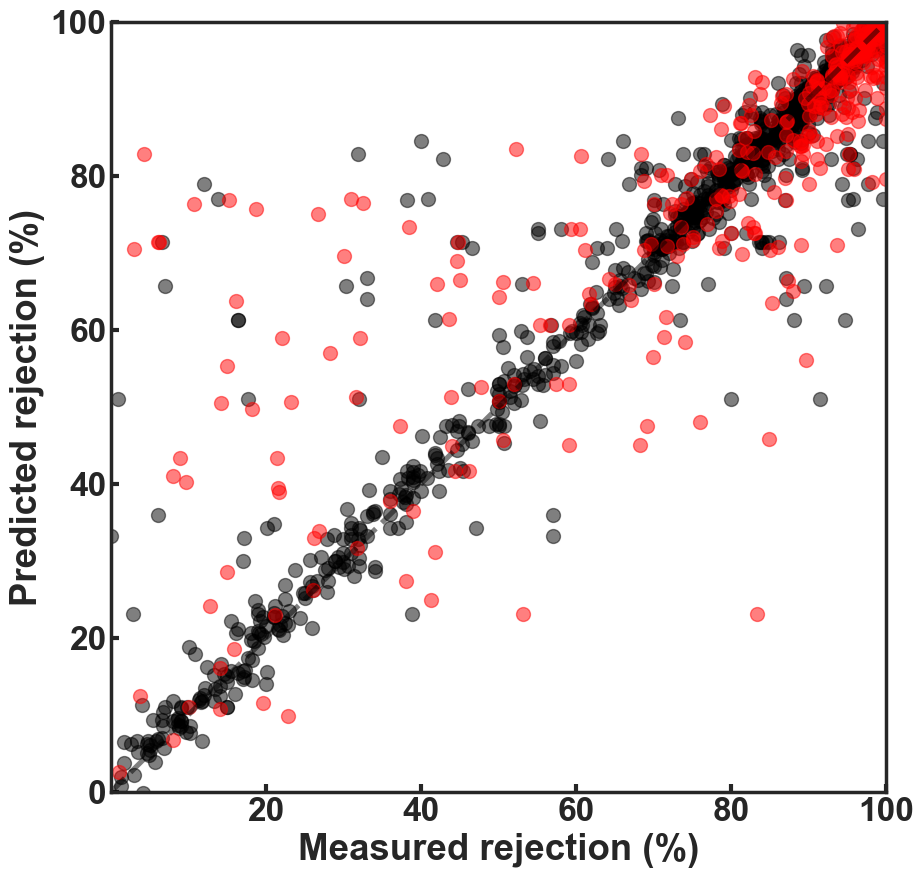

In [93]:
pred_train_lgb = search_lgb.predict(x_train_scaled)
pred_test_lgb = search_lgb.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_lgb))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_lgb))
print(r2_score(y_train_scaled, pred_train_lgb))
print(r2_score(y_test_scaled, pred_test_lgb))

pred_train_lgb_inverse = scaler_removal0.inverse_transform(pred_train_lgb.reshape(1,-1))
pred_test_lgb_inverse = scaler_removal2.inverse_transform(pred_test_lgb.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_lgb_real_scale = (1-(-pred_train_lgb_inverse)**2)*100
pred_test_lgb_real_scale = (1-(-pred_test_lgb_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_lgb_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_lgb_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [ ]:
reg_xgb = XGBRegressor()
param_grid_xgb = {'max_depth':range(1,20,2),
                  'min_child_weight':range(1,10,2),
                  'eta':[1e-5,1e-4,1e-3,1e-2,1e-1,1],
                  'subsample':np.linspace(0,1,9),
                  'colsample_bytree':np.linspace(0,1,9),
                  'n_estimators':[10, 50, 100, 200, 400, 800, 1200, 1600, 2000]
                 }
random_cv_xgb = RandomizedSearchCV(reg_xgb, param_grid_xgb, cv=7, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_xgb = random_cv_xgb.fit(x_train_scaled, y_train_scaled)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [ ]:
print(search_xgb.best_params_)
print(search_xgb.score(x_train_scaled, y_train_scaled))

0.003920732508941827
0.018515616553046635
0.9451345108723518
0.750370154709022


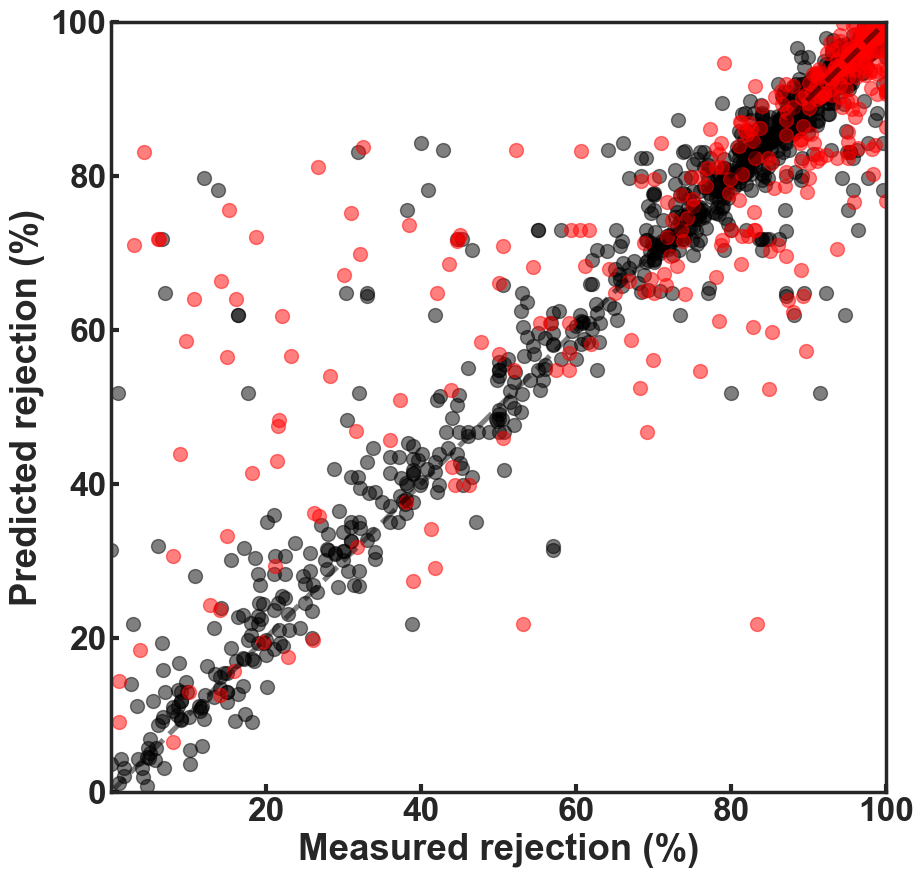

In [115]:
pred_train_xgb = search_xgb.predict(x_train_scaled)
pred_test_xgb = search_xgb.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_xgb))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_xgb))
print(r2_score(y_train_scaled, pred_train_xgb))
print(r2_score(y_test_scaled, pred_test_xgb))

pred_train_xgb_inverse = scaler_removal0.inverse_transform(pred_train_xgb.reshape(1,-1))
pred_test_xgb_inverse = scaler_removal2.inverse_transform(pred_test_xgb.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_xgb_real_scale = (1-(-pred_train_xgb_inverse)**2)*100
pred_test_xgb_real_scale = (1-(-pred_test_xgb_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_xgb_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_xgb_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [37]:
# # https://www.kaggle.com/code/lasmith/house-price-regression-with-lightgbm
# hyper_params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': ['l1','l2'],
#     'learning_rate': 0.005,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 0,
#     "max_depth": 8,
#     "num_leaves": 128,  
#     "max_bin": 512,
#     "num_iterations": 100000
# }

params = {
    "objective": "regression",
    "metric": "mse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

In [38]:
model = lgb.LGBMRegressor(**params)
model.fit(x_train_scaled, y_train_scaled)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 1219, number of used features: 142
[LightGBM] [Info] Start training from score 0.621924


LGBMRegressor(feature_fraction=0.9, learning_rate=0.05, metric='mse',
              objective='regression')

In [39]:
pred_y_lgb = model.predict(x_test_scaled)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [83]:
space = {
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.3),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', np.arange(2, 60, dtype=int)),
    'num_leaves': hp.choice('num_leaves', np.arange(2, 60, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(1, 60, dtype=int)),
    'min_child_samples': hp.choice('min_child_samples', np.arange(10, 500, dtype=int)),
    'min_child_weight': hp.uniform('min_child_weight', 0.01, 60),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.01, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 60.0)
    }

# Objective function
def objective(hyperparams):
    model = lgb.LGBMRegressor(
        **hyperparams,
        random_state=1,
        n_estimators=1000,
        verbose=-1,
        early_stopping_round=30
    )
    model.fit(x_train_scaled, y_train_scaled, eval_set=[(x_val_scaled, y_val_scaled)])
    pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test_scaled, pred)
    return {'loss': mse, 'status': STATUS_OK}

# Run the algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=300, trials=Trials())

print("Best hyperparameters:", best)

best_lgbm = lgbm_bestF.best_estimator_
best_lgbm.booster_.save_model('model.txt')

 80%|███████████████████████████████████▏        | 240/300 [01:31<00:23,  2.56trial/s, best loss: 0.018112934082387615]

In [78]:
# XGBRegressor with Bayesian best parameters
model_B_best = lgb.LGBMRegressor(**best, random_state=6, n_estimators=2000)

evaluation = [(x_train_scaled, y_train_scaled), (x_test_scaled, y_test_scaled)]
model_B_best.fit(x_train_scaled, y_train_scaled, eval_set = evaluation)#, early_stopping_rounds=10)
y_pred_train_best = model_B_best.predict(x_train_scaled)
y_pred_val_best = model_B_best.predict(x_val_scaled)
y_pred_test_best = model_B_best.predict(x_test_scaled)
print(r2_score(y_train_scaled, y_pred_train_best))
print(r2_score(y_val_scaled, y_pred_val_best))
print(r2_score(y_test_scaled, y_pred_test_best))

# # Cross validation
# model_B_best_cv = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
#                              gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
#                              colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
#                              subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
#                              colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_B_best_cv, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?

[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=381 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=381 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 1296, number of used features: 143
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=381 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.621898
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples

In [27]:
params = {
        'learning_rate': params['learning_rate'],
        'min_data_in_leaf': params['min_data_in_leaf'],
        'num_leaves': params['num_leaves'],
        'max_depth': params['max_depth'],
        'min_child_samples': params['min_child_samples'],
        'min_child_weight': params['min_child_weight'],
        'colsample_bytree': params['colsample_bytree'],
        'subsample': params['subsample'],
        'reg_lambda': params['reg_lambda'],
        'bagging_fraction': params['bagging_fraction'],
        'bagging_freq': params['bagging_freq']
        }

NameError: name 'params' is not defined

In [57]:
# https://www.kaggle.com/code/ilialar/hyperparameters-tunning-with-hyperopt/notebook

def gb_mse_cv(params, random_state=6, cv=5, X=x_train_scaled, y=y_train_scaled):
    
    params = {
        'learning_rate': params['learning_rate'],
        'min_data_in_leaf': params['min_data_in_leaf'],
        'num_leaves': params['num_leaves'],
        'max_depth': params['max_depth'],
        'min_child_samples': params['min_child_samples'],
        'min_child_weight': params['min_child_weight'],
        'colsample_bytree': params['colsample_bytree'],
        'subsample': params['subsample'],
        'reg_lambda': params['reg_lambda'],
        #'bagging_fraction': params['bagging_fraction'],
        #'bagging_freq': params['bagging_freq'],
        'feature_fraction': params['feature_fraction']
        }
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMRegressor(**params, objective='cross_entropy', tree_learner='feature', data_sample_strategy='goss', n_estimators=500, verbose=-1, random_state=6) 
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()

    return score

In [58]:
random_state = 6
n_iter = 200

space = {
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.2),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', np.arange(2, 80, dtype=int)),
    'num_leaves': hp.choice('num_leaves', np.arange(2, 80, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(1, 80, dtype=int)),
    'min_child_samples': hp.choice('min_child_samples', np.arange(10, 600, dtype=int)),
    'min_child_weight': hp.uniform('min_child_weight', 0.01, 80),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.01, 1),
    'subsample': hp.uniform('subsample', 0.01, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 80.0),
    #'bagging_fraction': hp.uniform('bagging_fraction', 0.01, 1),
    #'bagging_freq': hp.choice('bagging_freq', np.arange(1, 20, dtype=int)),
    'feature_fraction': hp.uniform('feature_fraction', 0.01, 1),
    }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials,
          rstate=np.random.default_rng(6)
         )

100%|████████████████████████████████████████████| 200/200 [03:19<00:00,  1.00trial/s, best loss: 0.018406240231769958]


In [59]:
print(best)
model = lgb.LGBMRegressor(**best, n_estimators=2000, random_state=6)
model.fit(x_train_scaled, y_train_scaled)
y_pred_train_best = model.predict(x_train_scaled)
y_pred_test_best = model.predict(x_test_scaled)
print(r2_score(y_train_scaled, y_pred_train_best))
print(r2_score(y_test_scaled, y_pred_test_best))
print(mean_squared_error(y_train_scaled, y_pred_train_best))
print(mean_squared_error(y_test_scaled, y_pred_test_best))

{'colsample_bytree': 0.37100551644193924, 'feature_fraction': 0.724981963433129, 'learning_rate': 0.19431367627533352, 'max_depth': 52, 'min_child_samples': 366, 'min_child_weight': 5.172947904310843, 'min_data_in_leaf': 11, 'num_leaves': 50, 'reg_lambda': 4.6997470217084505, 'subsample': 0.28126260821185256}
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=366 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.724981963433129, colsample_bytree=0.37100551644193924 will be ignored. Current value: feature_fraction=0.724981963433129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=366 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.724981963433129, colsample_bytree=0.37100551644193924 will be ignored. Current value: feature_fraction=0.724981963433129
[LightGBM] [Info] Auto-choo

In [51]:
# https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329
# https://www.kaggle.com/code/benfraser/regression-with-catboost

train_dataset = cb.Pool(x_train_scaled, y_train_scaled) 
test_dataset = cb.Pool(x_test_scaled, y_test_scaled)
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 200, 300, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.01, 0.1, 1, 5, 10]}
model.randomized_search(grid, train_dataset)

0:	learn: 0.6768517	test: 0.6745898	best: 0.6745898 (0)	total: 626us	remaining: 626ms
1:	learn: 0.6762788	test: 0.6740198	best: 0.6740198 (1)	total: 1.29ms	remaining: 643ms
2:	learn: 0.6757061	test: 0.6734491	best: 0.6734491 (2)	total: 1.82ms	remaining: 605ms
3:	learn: 0.6751307	test: 0.6728785	best: 0.6728785 (3)	total: 2.38ms	remaining: 593ms
4:	learn: 0.6745512	test: 0.6722944	best: 0.6722944 (4)	total: 3.01ms	remaining: 599ms
5:	learn: 0.6739759	test: 0.6717240	best: 0.6717240 (5)	total: 3.58ms	remaining: 594ms
6:	learn: 0.6734065	test: 0.6711541	best: 0.6711541 (6)	total: 4.14ms	remaining: 587ms
7:	learn: 0.6728322	test: 0.6705849	best: 0.6705849 (7)	total: 4.72ms	remaining: 585ms
8:	learn: 0.6722635	test: 0.6700157	best: 0.6700157 (8)	total: 5.31ms	remaining: 585ms
9:	learn: 0.6716924	test: 0.6694516	best: 0.6694516 (9)	total: 5.96ms	remaining: 590ms
10:	learn: 0.6711237	test: 0.6688848	best: 0.6688848 (10)	total: 6.75ms	remaining: 607ms
11:	learn: 0.6705505	test: 0.6683198	best:

360:	learn: 0.5072219	test: 0.5062550	best: 0.5062550 (360)	total: 203ms	remaining: 359ms
361:	learn: 0.5068499	test: 0.5058845	best: 0.5058845 (361)	total: 203ms	remaining: 359ms
362:	learn: 0.5064773	test: 0.5055167	best: 0.5055167 (362)	total: 204ms	remaining: 358ms
363:	learn: 0.5061042	test: 0.5051443	best: 0.5051443 (363)	total: 205ms	remaining: 357ms
364:	learn: 0.5057195	test: 0.5047706	best: 0.5047706 (364)	total: 205ms	remaining: 357ms
365:	learn: 0.5053353	test: 0.5043991	best: 0.5043991 (365)	total: 206ms	remaining: 356ms
366:	learn: 0.5049652	test: 0.5040298	best: 0.5040298 (366)	total: 207ms	remaining: 356ms
367:	learn: 0.5045961	test: 0.5036625	best: 0.5036625 (367)	total: 207ms	remaining: 356ms
368:	learn: 0.5042268	test: 0.5032957	best: 0.5032957 (368)	total: 208ms	remaining: 355ms
369:	learn: 0.5038521	test: 0.5029231	best: 0.5029231 (369)	total: 208ms	remaining: 354ms
370:	learn: 0.5034797	test: 0.5025540	best: 0.5025540 (370)	total: 209ms	remaining: 354ms
371:	learn

644:	learn: 0.4164260	test: 0.4167868	best: 0.4167868 (644)	total: 405ms	remaining: 223ms
645:	learn: 0.4161608	test: 0.4165304	best: 0.4165304 (645)	total: 405ms	remaining: 222ms
646:	learn: 0.4158847	test: 0.4162495	best: 0.4162495 (646)	total: 406ms	remaining: 221ms
647:	learn: 0.4156132	test: 0.4159906	best: 0.4159906 (647)	total: 406ms	remaining: 221ms
648:	learn: 0.4153514	test: 0.4157361	best: 0.4157361 (648)	total: 407ms	remaining: 220ms
649:	learn: 0.4150872	test: 0.4154766	best: 0.4154766 (649)	total: 407ms	remaining: 219ms
650:	learn: 0.4148214	test: 0.4152128	best: 0.4152128 (650)	total: 408ms	remaining: 219ms
651:	learn: 0.4145629	test: 0.4149568	best: 0.4149568 (651)	total: 408ms	remaining: 218ms
652:	learn: 0.4142876	test: 0.4146907	best: 0.4146907 (652)	total: 409ms	remaining: 217ms
653:	learn: 0.4140245	test: 0.4144362	best: 0.4144362 (653)	total: 409ms	remaining: 217ms
654:	learn: 0.4137636	test: 0.4141807	best: 0.4141807 (654)	total: 410ms	remaining: 216ms
655:	learn

31:	learn: 0.6595621	test: 0.6573881	best: 0.6573881 (31)	total: 16.4ms	remaining: 496ms
32:	learn: 0.6590159	test: 0.6568429	best: 0.6568429 (32)	total: 17.1ms	remaining: 502ms
33:	learn: 0.6584660	test: 0.6562930	best: 0.6562930 (33)	total: 17.7ms	remaining: 502ms
34:	learn: 0.6579209	test: 0.6557476	best: 0.6557476 (34)	total: 18.2ms	remaining: 503ms
35:	learn: 0.6573782	test: 0.6552063	best: 0.6552063 (35)	total: 18.8ms	remaining: 505ms
36:	learn: 0.6568331	test: 0.6546631	best: 0.6546631 (36)	total: 19.5ms	remaining: 507ms
37:	learn: 0.6562910	test: 0.6541208	best: 0.6541208 (37)	total: 20.4ms	remaining: 515ms
38:	learn: 0.6557415	test: 0.6535786	best: 0.6535786 (38)	total: 20.9ms	remaining: 516ms
39:	learn: 0.6551963	test: 0.6530366	best: 0.6530366 (39)	total: 21.5ms	remaining: 515ms
40:	learn: 0.6546520	test: 0.6524946	best: 0.6524946 (40)	total: 22ms	remaining: 515ms
41:	learn: 0.6541080	test: 0.6519503	best: 0.6519503 (41)	total: 22.6ms	remaining: 515ms
42:	learn: 0.6535658	te

353:	learn: 0.5119157	test: 0.5109360	best: 0.5109360 (353)	total: 214ms	remaining: 390ms
354:	learn: 0.5115385	test: 0.5105662	best: 0.5105662 (354)	total: 215ms	remaining: 390ms
355:	learn: 0.5111637	test: 0.5101976	best: 0.5101976 (355)	total: 215ms	remaining: 390ms
356:	learn: 0.5107901	test: 0.5098254	best: 0.5098254 (356)	total: 216ms	remaining: 389ms
357:	learn: 0.5104188	test: 0.5094554	best: 0.5094554 (357)	total: 217ms	remaining: 389ms
358:	learn: 0.5100460	test: 0.5090842	best: 0.5090842 (358)	total: 217ms	remaining: 388ms
359:	learn: 0.5096693	test: 0.5087144	best: 0.5087144 (359)	total: 218ms	remaining: 388ms
360:	learn: 0.5092962	test: 0.5083499	best: 0.5083499 (360)	total: 219ms	remaining: 387ms
361:	learn: 0.5089263	test: 0.5079814	best: 0.5079814 (361)	total: 220ms	remaining: 387ms
362:	learn: 0.5085578	test: 0.5076195	best: 0.5076195 (362)	total: 220ms	remaining: 386ms
363:	learn: 0.5081892	test: 0.5072518	best: 0.5072518 (363)	total: 221ms	remaining: 386ms
364:	learn

647:	learn: 0.4184192	test: 0.4188332	best: 0.4188332 (647)	total: 410ms	remaining: 223ms
648:	learn: 0.4181509	test: 0.4185770	best: 0.4185770 (648)	total: 411ms	remaining: 222ms
649:	learn: 0.4178868	test: 0.4183166	best: 0.4183166 (649)	total: 412ms	remaining: 222ms
650:	learn: 0.4176258	test: 0.4180627	best: 0.4180627 (650)	total: 412ms	remaining: 221ms
651:	learn: 0.4173677	test: 0.4178107	best: 0.4178107 (651)	total: 413ms	remaining: 220ms
652:	learn: 0.4171046	test: 0.4175451	best: 0.4175451 (652)	total: 414ms	remaining: 220ms
653:	learn: 0.4168408	test: 0.4172794	best: 0.4172794 (653)	total: 414ms	remaining: 219ms
654:	learn: 0.4165807	test: 0.4170261	best: 0.4170261 (654)	total: 415ms	remaining: 219ms
655:	learn: 0.4163185	test: 0.4167614	best: 0.4167614 (655)	total: 416ms	remaining: 218ms
656:	learn: 0.4160632	test: 0.4165102	best: 0.4165102 (656)	total: 416ms	remaining: 217ms
657:	learn: 0.4158019	test: 0.4162513	best: 0.4162513 (657)	total: 417ms	remaining: 217ms
658:	learn

926:	learn: 0.3568067	test: 0.3585621	best: 0.3585621 (926)	total: 609ms	remaining: 48ms
927:	learn: 0.3566297	test: 0.3583909	best: 0.3583909 (927)	total: 610ms	remaining: 47.3ms
928:	learn: 0.3564507	test: 0.3582203	best: 0.3582203 (928)	total: 611ms	remaining: 46.7ms
929:	learn: 0.3562619	test: 0.3580376	best: 0.3580376 (929)	total: 611ms	remaining: 46ms
930:	learn: 0.3560840	test: 0.3578665	best: 0.3578665 (930)	total: 612ms	remaining: 45.4ms
931:	learn: 0.3559102	test: 0.3576960	best: 0.3576960 (931)	total: 613ms	remaining: 44.7ms
932:	learn: 0.3557300	test: 0.3575237	best: 0.3575237 (932)	total: 613ms	remaining: 44ms
933:	learn: 0.3555547	test: 0.3573597	best: 0.3573597 (933)	total: 614ms	remaining: 43.4ms
934:	learn: 0.3553811	test: 0.3571901	best: 0.3571901 (934)	total: 615ms	remaining: 42.7ms
935:	learn: 0.3551901	test: 0.3570058	best: 0.3570058 (935)	total: 615ms	remaining: 42.1ms
936:	learn: 0.3549975	test: 0.3568231	best: 0.3568231 (936)	total: 616ms	remaining: 41.4ms
937:	

93:	learn: 0.6256024	test: 0.6238324	best: 0.6238324 (93)	total: 140ms	remaining: 8.96ms
94:	learn: 0.6250764	test: 0.6233181	best: 0.6233181 (94)	total: 142ms	remaining: 7.48ms
95:	learn: 0.6245575	test: 0.6227942	best: 0.6227942 (95)	total: 144ms	remaining: 5.99ms
96:	learn: 0.6240385	test: 0.6222801	best: 0.6222801 (96)	total: 145ms	remaining: 4.49ms
97:	learn: 0.6235158	test: 0.6217706	best: 0.6217706 (97)	total: 147ms	remaining: 2.99ms
98:	learn: 0.6229963	test: 0.6212490	best: 0.6212490 (98)	total: 148ms	remaining: 1.5ms
99:	learn: 0.6224759	test: 0.6207357	best: 0.6207357 (99)	total: 150ms	remaining: 0us

bestTest = 0.6207357182
bestIteration = 99

2:	loss: 0.6207357	best: 0.3430863 (0)	total: 1.49s	remaining: 3.49s
0:	learn: 0.6715831	test: 0.6693450	best: 0.6693450 (0)	total: 1.18ms	remaining: 234ms
1:	learn: 0.6658506	test: 0.6636865	best: 0.6636865 (1)	total: 2.54ms	remaining: 251ms
2:	learn: 0.6601682	test: 0.6580673	best: 0.6580673 (2)	total: 3.89ms	remaining: 255ms
3:	lea

118:	learn: 0.3022197	test: 0.3059834	best: 0.3059834 (118)	total: 190ms	remaining: 129ms
119:	learn: 0.3006194	test: 0.3043383	best: 0.3043383 (119)	total: 192ms	remaining: 128ms
120:	learn: 0.2992840	test: 0.3030103	best: 0.3030103 (120)	total: 193ms	remaining: 126ms
121:	learn: 0.2979890	test: 0.3018052	best: 0.3018052 (121)	total: 194ms	remaining: 124ms
122:	learn: 0.2965960	test: 0.3004593	best: 0.3004593 (122)	total: 196ms	remaining: 123ms
123:	learn: 0.2952125	test: 0.2991662	best: 0.2991662 (123)	total: 197ms	remaining: 121ms
124:	learn: 0.2939000	test: 0.2979179	best: 0.2979179 (124)	total: 198ms	remaining: 119ms
125:	learn: 0.2925848	test: 0.2967136	best: 0.2967136 (125)	total: 200ms	remaining: 117ms
126:	learn: 0.2914445	test: 0.2956521	best: 0.2956521 (126)	total: 201ms	remaining: 116ms
127:	learn: 0.2902193	test: 0.2944493	best: 0.2944493 (127)	total: 203ms	remaining: 114ms
128:	learn: 0.2889242	test: 0.2931642	best: 0.2931642 (128)	total: 204ms	remaining: 112ms
129:	learn

49:	learn: 0.1757126	test: 0.1837994	best: 0.1837994 (49)	total: 69.4ms	remaining: 347ms
50:	learn: 0.1752906	test: 0.1833939	best: 0.1833939 (50)	total: 71.1ms	remaining: 347ms
51:	learn: 0.1742933	test: 0.1825075	best: 0.1825075 (51)	total: 72.5ms	remaining: 346ms
52:	learn: 0.1736438	test: 0.1821338	best: 0.1821338 (52)	total: 73.9ms	remaining: 344ms
53:	learn: 0.1730906	test: 0.1819081	best: 0.1819081 (53)	total: 75.4ms	remaining: 344ms
54:	learn: 0.1725399	test: 0.1815023	best: 0.1815023 (54)	total: 76.9ms	remaining: 342ms
55:	learn: 0.1715394	test: 0.1803238	best: 0.1803238 (55)	total: 78.2ms	remaining: 341ms
56:	learn: 0.1709310	test: 0.1796784	best: 0.1796784 (56)	total: 79.7ms	remaining: 340ms
57:	learn: 0.1704172	test: 0.1792705	best: 0.1792705 (57)	total: 81.2ms	remaining: 339ms
58:	learn: 0.1694722	test: 0.1786479	best: 0.1786479 (58)	total: 82.5ms	remaining: 337ms
59:	learn: 0.1689040	test: 0.1781103	best: 0.1781103 (59)	total: 83.8ms	remaining: 335ms
60:	learn: 0.1678545	

185:	learn: 0.1192666	test: 0.1460656	best: 0.1460656 (185)	total: 274ms	remaining: 168ms
186:	learn: 0.1190403	test: 0.1459564	best: 0.1459564 (186)	total: 276ms	remaining: 167ms
187:	learn: 0.1188200	test: 0.1459729	best: 0.1459564 (186)	total: 277ms	remaining: 165ms
188:	learn: 0.1186720	test: 0.1457180	best: 0.1457180 (188)	total: 279ms	remaining: 164ms
189:	learn: 0.1185206	test: 0.1456209	best: 0.1456209 (189)	total: 281ms	remaining: 163ms
190:	learn: 0.1182720	test: 0.1454464	best: 0.1454464 (190)	total: 283ms	remaining: 161ms
191:	learn: 0.1179748	test: 0.1452039	best: 0.1452039 (191)	total: 284ms	remaining: 160ms
192:	learn: 0.1176411	test: 0.1449538	best: 0.1449538 (192)	total: 287ms	remaining: 159ms
193:	learn: 0.1175297	test: 0.1449536	best: 0.1449536 (193)	total: 289ms	remaining: 158ms
194:	learn: 0.1172599	test: 0.1449848	best: 0.1449536 (193)	total: 292ms	remaining: 157ms
195:	learn: 0.1171491	test: 0.1449777	best: 0.1449536 (193)	total: 294ms	remaining: 156ms
196:	learn

1:	learn: 0.6658615	test: 0.6636978	best: 0.6636978 (1)	total: 3.25ms	remaining: 1.62s
2:	learn: 0.6601841	test: 0.6580851	best: 0.6580851 (2)	total: 4.86ms	remaining: 1.62s
3:	learn: 0.6545876	test: 0.6524738	best: 0.6524738 (3)	total: 6.4ms	remaining: 1.59s
4:	learn: 0.6490519	test: 0.6470123	best: 0.6470123 (4)	total: 7.86ms	remaining: 1.56s
5:	learn: 0.6435181	test: 0.6415309	best: 0.6415309 (5)	total: 9.19ms	remaining: 1.52s
6:	learn: 0.6381443	test: 0.6361949	best: 0.6361949 (6)	total: 10.5ms	remaining: 1.49s
7:	learn: 0.6327205	test: 0.6307894	best: 0.6307894 (7)	total: 12ms	remaining: 1.48s
8:	learn: 0.6273808	test: 0.6255983	best: 0.6255983 (8)	total: 13.6ms	remaining: 1.49s
9:	learn: 0.6221480	test: 0.6204343	best: 0.6204343 (9)	total: 15.1ms	remaining: 1.5s
10:	learn: 0.6169937	test: 0.6153728	best: 0.6153728 (10)	total: 16.8ms	remaining: 1.51s
11:	learn: 0.6118794	test: 0.6103222	best: 0.6103222 (11)	total: 19.1ms	remaining: 1.58s
12:	learn: 0.6068606	test: 0.6053664	best: 

129:	learn: 0.2879976	test: 0.2922472	best: 0.2922472 (129)	total: 200ms	remaining: 1.33s
130:	learn: 0.2868442	test: 0.2910734	best: 0.2910734 (130)	total: 201ms	remaining: 1.33s
131:	learn: 0.2856439	test: 0.2898523	best: 0.2898523 (131)	total: 203ms	remaining: 1.33s
132:	learn: 0.2845318	test: 0.2887855	best: 0.2887855 (132)	total: 204ms	remaining: 1.33s
133:	learn: 0.2835399	test: 0.2878125	best: 0.2878125 (133)	total: 206ms	remaining: 1.33s
134:	learn: 0.2824788	test: 0.2867396	best: 0.2867396 (134)	total: 207ms	remaining: 1.33s
135:	learn: 0.2813397	test: 0.2856308	best: 0.2856308 (135)	total: 208ms	remaining: 1.32s
136:	learn: 0.2802728	test: 0.2845564	best: 0.2845564 (136)	total: 210ms	remaining: 1.32s
137:	learn: 0.2791044	test: 0.2833457	best: 0.2833457 (137)	total: 211ms	remaining: 1.32s
138:	learn: 0.2779502	test: 0.2822636	best: 0.2822636 (138)	total: 212ms	remaining: 1.31s
139:	learn: 0.2767906	test: 0.2811683	best: 0.2811683 (139)	total: 213ms	remaining: 1.31s
140:	learn

227:	learn: 0.2193069	test: 0.2251830	best: 0.2251830 (227)	total: 411ms	remaining: 1.39s
228:	learn: 0.2190423	test: 0.2249208	best: 0.2249208 (228)	total: 413ms	remaining: 1.39s
229:	learn: 0.2187038	test: 0.2245826	best: 0.2245826 (229)	total: 415ms	remaining: 1.39s
230:	learn: 0.2184142	test: 0.2242907	best: 0.2242907 (230)	total: 416ms	remaining: 1.38s
231:	learn: 0.2181113	test: 0.2240549	best: 0.2240549 (231)	total: 417ms	remaining: 1.38s
232:	learn: 0.2177218	test: 0.2237168	best: 0.2237168 (232)	total: 419ms	remaining: 1.38s
233:	learn: 0.2173545	test: 0.2234229	best: 0.2234229 (233)	total: 420ms	remaining: 1.38s
234:	learn: 0.2170970	test: 0.2231617	best: 0.2231617 (234)	total: 422ms	remaining: 1.37s
235:	learn: 0.2167582	test: 0.2228427	best: 0.2228427 (235)	total: 423ms	remaining: 1.37s
236:	learn: 0.2164468	test: 0.2225487	best: 0.2225487 (236)	total: 425ms	remaining: 1.37s
237:	learn: 0.2160834	test: 0.2222295	best: 0.2222295 (237)	total: 427ms	remaining: 1.37s
238:	learn

329:	learn: 0.1941728	test: 0.2006558	best: 0.2006558 (329)	total: 608ms	remaining: 1.24s
330:	learn: 0.1939702	test: 0.2004301	best: 0.2004301 (330)	total: 610ms	remaining: 1.23s
331:	learn: 0.1938254	test: 0.2002898	best: 0.2002898 (331)	total: 612ms	remaining: 1.23s
332:	learn: 0.1936523	test: 0.2001223	best: 0.2001223 (332)	total: 613ms	remaining: 1.23s
333:	learn: 0.1935334	test: 0.2000099	best: 0.2000099 (333)	total: 614ms	remaining: 1.23s
334:	learn: 0.1934005	test: 0.1998927	best: 0.1998927 (334)	total: 616ms	remaining: 1.22s
335:	learn: 0.1932874	test: 0.1998025	best: 0.1998025 (335)	total: 617ms	remaining: 1.22s
336:	learn: 0.1931743	test: 0.1996734	best: 0.1996734 (336)	total: 619ms	remaining: 1.22s
337:	learn: 0.1930809	test: 0.1995712	best: 0.1995712 (337)	total: 620ms	remaining: 1.22s
338:	learn: 0.1928919	test: 0.1993967	best: 0.1993967 (338)	total: 622ms	remaining: 1.21s
339:	learn: 0.1927970	test: 0.1993202	best: 0.1993202 (339)	total: 623ms	remaining: 1.21s
340:	learn

464:	learn: 0.1786056	test: 0.1868901	best: 0.1868901 (464)	total: 810ms	remaining: 932ms
465:	learn: 0.1785322	test: 0.1868190	best: 0.1868190 (465)	total: 812ms	remaining: 930ms
466:	learn: 0.1784719	test: 0.1867621	best: 0.1867621 (466)	total: 814ms	remaining: 929ms
467:	learn: 0.1784114	test: 0.1866953	best: 0.1866953 (467)	total: 815ms	remaining: 926ms
468:	learn: 0.1783212	test: 0.1865810	best: 0.1865810 (468)	total: 817ms	remaining: 925ms
469:	learn: 0.1782354	test: 0.1865241	best: 0.1865241 (469)	total: 818ms	remaining: 923ms
470:	learn: 0.1781569	test: 0.1864349	best: 0.1864349 (470)	total: 820ms	remaining: 921ms
471:	learn: 0.1780479	test: 0.1863643	best: 0.1863643 (471)	total: 821ms	remaining: 918ms
472:	learn: 0.1779537	test: 0.1862832	best: 0.1862832 (472)	total: 823ms	remaining: 916ms
473:	learn: 0.1779186	test: 0.1862588	best: 0.1862588 (473)	total: 824ms	remaining: 914ms
474:	learn: 0.1778329	test: 0.1861217	best: 0.1861217 (474)	total: 826ms	remaining: 913ms
475:	learn

594:	learn: 0.1688093	test: 0.1784964	best: 0.1784964 (594)	total: 1.01s	remaining: 690ms
595:	learn: 0.1687279	test: 0.1784088	best: 0.1784088 (595)	total: 1.01s	remaining: 688ms
596:	learn: 0.1686715	test: 0.1783815	best: 0.1783815 (596)	total: 1.02s	remaining: 686ms
597:	learn: 0.1685891	test: 0.1783259	best: 0.1783259 (597)	total: 1.02s	remaining: 684ms
598:	learn: 0.1685447	test: 0.1782695	best: 0.1782695 (598)	total: 1.02s	remaining: 683ms
599:	learn: 0.1685063	test: 0.1782270	best: 0.1782270 (599)	total: 1.02s	remaining: 681ms
600:	learn: 0.1684553	test: 0.1782021	best: 0.1782021 (600)	total: 1.02s	remaining: 679ms
601:	learn: 0.1683706	test: 0.1781296	best: 0.1781296 (601)	total: 1.02s	remaining: 677ms
602:	learn: 0.1683011	test: 0.1780664	best: 0.1780664 (602)	total: 1.02s	remaining: 675ms
603:	learn: 0.1681939	test: 0.1780151	best: 0.1780151 (603)	total: 1.03s	remaining: 673ms
604:	learn: 0.1680968	test: 0.1779430	best: 0.1779430 (604)	total: 1.03s	remaining: 671ms
605:	learn

706:	learn: 0.1612514	test: 0.1721931	best: 0.1721931 (706)	total: 1.21s	remaining: 501ms
707:	learn: 0.1612071	test: 0.1721632	best: 0.1721632 (707)	total: 1.21s	remaining: 499ms
708:	learn: 0.1611550	test: 0.1721134	best: 0.1721134 (708)	total: 1.21s	remaining: 497ms
709:	learn: 0.1610442	test: 0.1720012	best: 0.1720012 (709)	total: 1.21s	remaining: 496ms
710:	learn: 0.1609947	test: 0.1719506	best: 0.1719506 (710)	total: 1.21s	remaining: 494ms
711:	learn: 0.1609455	test: 0.1718758	best: 0.1718758 (711)	total: 1.22s	remaining: 492ms
712:	learn: 0.1608591	test: 0.1718057	best: 0.1718057 (712)	total: 1.22s	remaining: 491ms
713:	learn: 0.1607711	test: 0.1717362	best: 0.1717362 (713)	total: 1.22s	remaining: 489ms
714:	learn: 0.1607277	test: 0.1716961	best: 0.1716961 (714)	total: 1.22s	remaining: 487ms
715:	learn: 0.1606768	test: 0.1716340	best: 0.1716340 (715)	total: 1.23s	remaining: 486ms
716:	learn: 0.1606269	test: 0.1716125	best: 0.1716125 (716)	total: 1.23s	remaining: 484ms
717:	learn

833:	learn: 0.1536753	test: 0.1660832	best: 0.1660832 (833)	total: 1.41s	remaining: 280ms
834:	learn: 0.1536049	test: 0.1660668	best: 0.1660668 (834)	total: 1.41s	remaining: 278ms
835:	learn: 0.1535649	test: 0.1660518	best: 0.1660518 (835)	total: 1.41s	remaining: 276ms
836:	learn: 0.1535031	test: 0.1660653	best: 0.1660518 (835)	total: 1.41s	remaining: 275ms
837:	learn: 0.1534672	test: 0.1660361	best: 0.1660361 (837)	total: 1.41s	remaining: 273ms
838:	learn: 0.1533975	test: 0.1660297	best: 0.1660297 (838)	total: 1.41s	remaining: 271ms
839:	learn: 0.1533627	test: 0.1659979	best: 0.1659979 (839)	total: 1.41s	remaining: 269ms
840:	learn: 0.1533101	test: 0.1659912	best: 0.1659912 (840)	total: 1.42s	remaining: 268ms
841:	learn: 0.1532577	test: 0.1659476	best: 0.1659476 (841)	total: 1.42s	remaining: 266ms
842:	learn: 0.1532120	test: 0.1659202	best: 0.1659202 (842)	total: 1.42s	remaining: 264ms
843:	learn: 0.1531709	test: 0.1659063	best: 0.1659063 (843)	total: 1.42s	remaining: 263ms
844:	learn

966:	learn: 0.1468527	test: 0.1614053	best: 0.1614053 (966)	total: 1.6s	remaining: 54.6ms
967:	learn: 0.1467793	test: 0.1613518	best: 0.1613518 (967)	total: 1.6s	remaining: 53ms
968:	learn: 0.1467217	test: 0.1613446	best: 0.1613446 (968)	total: 1.6s	remaining: 51.3ms
969:	learn: 0.1466801	test: 0.1612918	best: 0.1612918 (969)	total: 1.6s	remaining: 49.7ms
970:	learn: 0.1466105	test: 0.1612311	best: 0.1612311 (970)	total: 1.61s	remaining: 48ms
971:	learn: 0.1465677	test: 0.1611797	best: 0.1611797 (971)	total: 1.61s	remaining: 46.4ms
972:	learn: 0.1465065	test: 0.1611054	best: 0.1611054 (972)	total: 1.61s	remaining: 44.7ms
973:	learn: 0.1464683	test: 0.1610813	best: 0.1610813 (973)	total: 1.61s	remaining: 43ms
974:	learn: 0.1464199	test: 0.1610234	best: 0.1610234 (974)	total: 1.61s	remaining: 41.4ms
975:	learn: 0.1463809	test: 0.1610213	best: 0.1610213 (975)	total: 1.61s	remaining: 39.7ms
976:	learn: 0.1463317	test: 0.1609554	best: 0.1609554 (976)	total: 1.62s	remaining: 38.1ms
977:	lear

110:	learn: 0.1160663	test: 0.1460858	best: 0.1460858 (110)	total: 351ms	remaining: 1.23s
111:	learn: 0.1155539	test: 0.1459988	best: 0.1459988 (111)	total: 354ms	remaining: 1.23s
112:	learn: 0.1152582	test: 0.1458770	best: 0.1458770 (112)	total: 358ms	remaining: 1.23s
113:	learn: 0.1147440	test: 0.1460054	best: 0.1458770 (112)	total: 361ms	remaining: 1.22s
114:	learn: 0.1143977	test: 0.1458496	best: 0.1458496 (114)	total: 364ms	remaining: 1.22s
115:	learn: 0.1137163	test: 0.1456051	best: 0.1456051 (115)	total: 369ms	remaining: 1.22s
116:	learn: 0.1132740	test: 0.1453201	best: 0.1453201 (116)	total: 373ms	remaining: 1.22s
117:	learn: 0.1128824	test: 0.1451359	best: 0.1451359 (117)	total: 376ms	remaining: 1.22s
118:	learn: 0.1124377	test: 0.1449584	best: 0.1449584 (118)	total: 380ms	remaining: 1.22s
119:	learn: 0.1119536	test: 0.1446302	best: 0.1446302 (119)	total: 383ms	remaining: 1.21s
120:	learn: 0.1112909	test: 0.1441353	best: 0.1441353 (120)	total: 387ms	remaining: 1.21s
121:	learn

231:	learn: 0.0845098	test: 0.1344570	best: 0.1344421 (225)	total: 756ms	remaining: 873ms
232:	learn: 0.0843330	test: 0.1342709	best: 0.1342709 (232)	total: 759ms	remaining: 869ms
233:	learn: 0.0841627	test: 0.1341823	best: 0.1341823 (233)	total: 762ms	remaining: 866ms
234:	learn: 0.0840187	test: 0.1341770	best: 0.1341770 (234)	total: 765ms	remaining: 863ms
235:	learn: 0.0838852	test: 0.1340797	best: 0.1340797 (235)	total: 769ms	remaining: 861ms
236:	learn: 0.0838037	test: 0.1341179	best: 0.1340797 (235)	total: 773ms	remaining: 858ms
237:	learn: 0.0836231	test: 0.1340135	best: 0.1340135 (237)	total: 776ms	remaining: 855ms
238:	learn: 0.0834487	test: 0.1339344	best: 0.1339344 (238)	total: 780ms	remaining: 852ms
239:	learn: 0.0832651	test: 0.1338350	best: 0.1338350 (239)	total: 785ms	remaining: 850ms
240:	learn: 0.0830527	test: 0.1338282	best: 0.1338282 (240)	total: 788ms	remaining: 847ms
241:	learn: 0.0829019	test: 0.1338431	best: 0.1338282 (240)	total: 791ms	remaining: 843ms
242:	learn

348:	learn: 0.0727160	test: 0.1312477	best: 0.1310311 (343)	total: 1.16s	remaining: 502ms
349:	learn: 0.0726490	test: 0.1312316	best: 0.1310311 (343)	total: 1.16s	remaining: 499ms
350:	learn: 0.0725753	test: 0.1312471	best: 0.1310311 (343)	total: 1.17s	remaining: 495ms
351:	learn: 0.0724891	test: 0.1311602	best: 0.1310311 (343)	total: 1.17s	remaining: 492ms
352:	learn: 0.0724325	test: 0.1311141	best: 0.1310311 (343)	total: 1.17s	remaining: 489ms
353:	learn: 0.0723434	test: 0.1311677	best: 0.1310311 (343)	total: 1.18s	remaining: 486ms
354:	learn: 0.0722387	test: 0.1312750	best: 0.1310311 (343)	total: 1.18s	remaining: 483ms
355:	learn: 0.0721725	test: 0.1312600	best: 0.1310311 (343)	total: 1.19s	remaining: 480ms
356:	learn: 0.0721432	test: 0.1312179	best: 0.1310311 (343)	total: 1.19s	remaining: 478ms
357:	learn: 0.0720544	test: 0.1311794	best: 0.1310311 (343)	total: 1.2s	remaining: 474ms
358:	learn: 0.0720058	test: 0.1311423	best: 0.1310311 (343)	total: 1.2s	remaining: 471ms
359:	learn: 

466:	learn: 0.0665021	test: 0.1295326	best: 0.1295275 (460)	total: 1.56s	remaining: 110ms
467:	learn: 0.0664535	test: 0.1294752	best: 0.1294752 (467)	total: 1.57s	remaining: 107ms
468:	learn: 0.0664510	test: 0.1294712	best: 0.1294712 (468)	total: 1.57s	remaining: 104ms
469:	learn: 0.0664162	test: 0.1294904	best: 0.1294712 (468)	total: 1.57s	remaining: 100ms
470:	learn: 0.0663743	test: 0.1295079	best: 0.1294712 (468)	total: 1.58s	remaining: 97.2ms
471:	learn: 0.0663353	test: 0.1295071	best: 0.1294712 (468)	total: 1.58s	remaining: 94ms
472:	learn: 0.0663140	test: 0.1294924	best: 0.1294712 (468)	total: 1.59s	remaining: 90.7ms
473:	learn: 0.0662584	test: 0.1294337	best: 0.1294337 (473)	total: 1.59s	remaining: 87.5ms
474:	learn: 0.0662109	test: 0.1295622	best: 0.1294337 (473)	total: 1.6s	remaining: 84.2ms
475:	learn: 0.0661553	test: 0.1295680	best: 0.1294337 (473)	total: 1.6s	remaining: 80.9ms
476:	learn: 0.0661272	test: 0.1295913	best: 0.1294337 (473)	total: 1.61s	remaining: 77.5ms
477:	le

83:	learn: 0.3940988	test: 0.3985399	best: 0.3985399 (83)	total: 702ms	remaining: 134ms
84:	learn: 0.3918483	test: 0.3964513	best: 0.3964513 (84)	total: 712ms	remaining: 126ms
85:	learn: 0.3899834	test: 0.3946424	best: 0.3946424 (85)	total: 725ms	remaining: 118ms
86:	learn: 0.3881819	test: 0.3930011	best: 0.3930011 (86)	total: 734ms	remaining: 110ms
87:	learn: 0.3860193	test: 0.3908207	best: 0.3908207 (87)	total: 743ms	remaining: 101ms
88:	learn: 0.3840143	test: 0.3889107	best: 0.3889107 (88)	total: 751ms	remaining: 92.8ms
89:	learn: 0.3818907	test: 0.3868345	best: 0.3868345 (89)	total: 759ms	remaining: 84.4ms
90:	learn: 0.3797586	test: 0.3847244	best: 0.3847244 (90)	total: 765ms	remaining: 75.6ms
91:	learn: 0.3779036	test: 0.3828969	best: 0.3828969 (91)	total: 772ms	remaining: 67.2ms
92:	learn: 0.3758675	test: 0.3809774	best: 0.3809774 (92)	total: 781ms	remaining: 58.8ms
93:	learn: 0.3737962	test: 0.3789441	best: 0.3789441 (93)	total: 790ms	remaining: 50.4ms
94:	learn: 0.3718284	test:

78:	learn: 0.1026969	test: 0.1445034	best: 0.1445034 (78)	total: 705ms	remaining: 3.75s
79:	learn: 0.1020079	test: 0.1443221	best: 0.1443221 (79)	total: 715ms	remaining: 3.75s
80:	learn: 0.1013656	test: 0.1439091	best: 0.1439091 (80)	total: 726ms	remaining: 3.75s
81:	learn: 0.1005424	test: 0.1434807	best: 0.1434807 (81)	total: 735ms	remaining: 3.75s
82:	learn: 0.0997754	test: 0.1431284	best: 0.1431284 (82)	total: 743ms	remaining: 3.73s
83:	learn: 0.0992334	test: 0.1425946	best: 0.1425946 (83)	total: 751ms	remaining: 3.72s
84:	learn: 0.0984476	test: 0.1419023	best: 0.1419023 (84)	total: 760ms	remaining: 3.71s
85:	learn: 0.0976828	test: 0.1413814	best: 0.1413814 (85)	total: 768ms	remaining: 3.7s
86:	learn: 0.0966175	test: 0.1406432	best: 0.1406432 (86)	total: 777ms	remaining: 3.69s
87:	learn: 0.0958160	test: 0.1406608	best: 0.1406432 (86)	total: 785ms	remaining: 3.67s
88:	learn: 0.0949301	test: 0.1402872	best: 0.1402872 (88)	total: 793ms	remaining: 3.66s
89:	learn: 0.0941705	test: 0.1397

172:	learn: 0.0679353	test: 0.1314211	best: 0.1310061 (166)	total: 1.52s	remaining: 2.88s
173:	learn: 0.0678423	test: 0.1314028	best: 0.1310061 (166)	total: 1.53s	remaining: 2.87s
174:	learn: 0.0677692	test: 0.1313147	best: 0.1310061 (166)	total: 1.54s	remaining: 2.87s
175:	learn: 0.0675641	test: 0.1311544	best: 0.1310061 (166)	total: 1.55s	remaining: 2.86s
176:	learn: 0.0673662	test: 0.1311002	best: 0.1310061 (166)	total: 1.56s	remaining: 2.85s
177:	learn: 0.0672147	test: 0.1312304	best: 0.1310061 (166)	total: 1.57s	remaining: 2.84s
178:	learn: 0.0671389	test: 0.1312208	best: 0.1310061 (166)	total: 1.58s	remaining: 2.83s
179:	learn: 0.0669099	test: 0.1311808	best: 0.1310061 (166)	total: 1.59s	remaining: 2.82s
180:	learn: 0.0666951	test: 0.1312200	best: 0.1310061 (166)	total: 1.59s	remaining: 2.81s
181:	learn: 0.0666326	test: 0.1311432	best: 0.1310061 (166)	total: 1.6s	remaining: 2.8s
182:	learn: 0.0665413	test: 0.1311088	best: 0.1310061 (166)	total: 1.61s	remaining: 2.79s
183:	learn: 

265:	learn: 0.0598993	test: 0.1292136	best: 0.1292136 (265)	total: 2.35s	remaining: 2.07s
266:	learn: 0.0598304	test: 0.1291482	best: 0.1291482 (266)	total: 2.36s	remaining: 2.06s
267:	learn: 0.0597857	test: 0.1291406	best: 0.1291406 (267)	total: 2.37s	remaining: 2.05s
268:	learn: 0.0597313	test: 0.1291312	best: 0.1291312 (268)	total: 2.38s	remaining: 2.05s
269:	learn: 0.0596956	test: 0.1291421	best: 0.1291312 (268)	total: 2.4s	remaining: 2.04s
270:	learn: 0.0596513	test: 0.1291402	best: 0.1291312 (268)	total: 2.4s	remaining: 2.03s
271:	learn: 0.0596049	test: 0.1291271	best: 0.1291271 (271)	total: 2.42s	remaining: 2.03s
272:	learn: 0.0595997	test: 0.1291237	best: 0.1291237 (272)	total: 2.43s	remaining: 2.02s
273:	learn: 0.0595046	test: 0.1290459	best: 0.1290459 (273)	total: 2.44s	remaining: 2.01s
274:	learn: 0.0594648	test: 0.1290028	best: 0.1290028 (274)	total: 2.44s	remaining: 2s
275:	learn: 0.0594375	test: 0.1289875	best: 0.1289875 (275)	total: 2.45s	remaining: 1.99s
276:	learn: 0.0

370:	learn: 0.0571705	test: 0.1292587	best: 0.1288111 (320)	total: 3.4s	remaining: 1.18s
371:	learn: 0.0571488	test: 0.1292545	best: 0.1288111 (320)	total: 3.4s	remaining: 1.17s
372:	learn: 0.0571410	test: 0.1292535	best: 0.1288111 (320)	total: 3.42s	remaining: 1.16s
373:	learn: 0.0571262	test: 0.1292641	best: 0.1288111 (320)	total: 3.42s	remaining: 1.15s
374:	learn: 0.0571097	test: 0.1292726	best: 0.1288111 (320)	total: 3.44s	remaining: 1.15s
375:	learn: 0.0570917	test: 0.1292643	best: 0.1288111 (320)	total: 3.45s	remaining: 1.14s
376:	learn: 0.0570693	test: 0.1292554	best: 0.1288111 (320)	total: 3.46s	remaining: 1.13s
377:	learn: 0.0570657	test: 0.1292560	best: 0.1288111 (320)	total: 3.47s	remaining: 1.12s
378:	learn: 0.0570436	test: 0.1292306	best: 0.1288111 (320)	total: 3.48s	remaining: 1.11s
379:	learn: 0.0570214	test: 0.1292109	best: 0.1288111 (320)	total: 3.49s	remaining: 1.1s
380:	learn: 0.0570066	test: 0.1291957	best: 0.1288111 (320)	total: 3.5s	remaining: 1.09s
381:	learn: 0.

464:	learn: 0.0561182	test: 0.1288524	best: 0.1288111 (320)	total: 4.43s	remaining: 334ms
465:	learn: 0.0561116	test: 0.1288568	best: 0.1288111 (320)	total: 4.45s	remaining: 325ms
466:	learn: 0.0561076	test: 0.1288622	best: 0.1288111 (320)	total: 4.46s	remaining: 315ms
467:	learn: 0.0561027	test: 0.1288772	best: 0.1288111 (320)	total: 4.47s	remaining: 306ms
468:	learn: 0.0560981	test: 0.1288780	best: 0.1288111 (320)	total: 4.48s	remaining: 296ms
469:	learn: 0.0560896	test: 0.1288658	best: 0.1288111 (320)	total: 4.49s	remaining: 287ms
470:	learn: 0.0560792	test: 0.1288912	best: 0.1288111 (320)	total: 4.5s	remaining: 277ms
471:	learn: 0.0560739	test: 0.1288784	best: 0.1288111 (320)	total: 4.51s	remaining: 268ms
472:	learn: 0.0560638	test: 0.1288735	best: 0.1288111 (320)	total: 4.52s	remaining: 258ms
473:	learn: 0.0560560	test: 0.1288775	best: 0.1288111 (320)	total: 4.53s	remaining: 248ms
474:	learn: 0.0560501	test: 0.1288792	best: 0.1288111 (320)	total: 4.54s	remaining: 239ms
475:	learn:

66:	learn: 0.4017057	test: 0.4064612	best: 0.4064612 (66)	total: 682ms	remaining: 9.5s
67:	learn: 0.3988659	test: 0.4037269	best: 0.4037269 (67)	total: 695ms	remaining: 9.53s
68:	learn: 0.3961228	test: 0.4011153	best: 0.4011153 (68)	total: 709ms	remaining: 9.57s
69:	learn: 0.3934743	test: 0.3985253	best: 0.3985253 (69)	total: 720ms	remaining: 9.57s
70:	learn: 0.3908301	test: 0.3959387	best: 0.3959387 (70)	total: 732ms	remaining: 9.58s
71:	learn: 0.3882123	test: 0.3933255	best: 0.3933255 (71)	total: 737ms	remaining: 9.5s
72:	learn: 0.3855905	test: 0.3908078	best: 0.3908078 (72)	total: 749ms	remaining: 9.51s
73:	learn: 0.3830450	test: 0.3882896	best: 0.3882896 (73)	total: 761ms	remaining: 9.52s
74:	learn: 0.3804882	test: 0.3858397	best: 0.3858397 (74)	total: 773ms	remaining: 9.53s
75:	learn: 0.3778562	test: 0.3832935	best: 0.3832935 (75)	total: 785ms	remaining: 9.55s
76:	learn: 0.3754205	test: 0.3809595	best: 0.3809595 (76)	total: 800ms	remaining: 9.59s
77:	learn: 0.3728574	test: 0.37859

163:	learn: 0.2374138	test: 0.2492991	best: 0.2492991 (163)	total: 1.94s	remaining: 9.88s
164:	learn: 0.2365137	test: 0.2484183	best: 0.2484183 (164)	total: 1.95s	remaining: 9.88s
165:	learn: 0.2356737	test: 0.2476356	best: 0.2476356 (165)	total: 1.97s	remaining: 9.88s
166:	learn: 0.2349023	test: 0.2468351	best: 0.2468351 (166)	total: 1.97s	remaining: 9.83s
167:	learn: 0.2338817	test: 0.2458284	best: 0.2458284 (167)	total: 1.98s	remaining: 9.81s
168:	learn: 0.2330855	test: 0.2450711	best: 0.2450711 (168)	total: 1.99s	remaining: 9.8s
169:	learn: 0.2321363	test: 0.2441796	best: 0.2441796 (169)	total: 2s	remaining: 9.78s
170:	learn: 0.2312103	test: 0.2433600	best: 0.2433600 (170)	total: 2.02s	remaining: 9.77s
171:	learn: 0.2304582	test: 0.2426244	best: 0.2426244 (171)	total: 2.02s	remaining: 9.74s
172:	learn: 0.2296018	test: 0.2418157	best: 0.2418157 (172)	total: 2.04s	remaining: 9.73s
173:	learn: 0.2288263	test: 0.2411206	best: 0.2411206 (173)	total: 2.05s	remaining: 9.71s
174:	learn: 0.

260:	learn: 0.1806926	test: 0.1975753	best: 0.1975753 (260)	total: 3.22s	remaining: 9.13s
261:	learn: 0.1803731	test: 0.1973455	best: 0.1973455 (261)	total: 3.24s	remaining: 9.12s
262:	learn: 0.1800208	test: 0.1969960	best: 0.1969960 (262)	total: 3.26s	remaining: 9.13s
263:	learn: 0.1796944	test: 0.1967485	best: 0.1967485 (263)	total: 3.27s	remaining: 9.13s
264:	learn: 0.1793003	test: 0.1964055	best: 0.1964055 (264)	total: 3.29s	remaining: 9.12s
265:	learn: 0.1789367	test: 0.1960784	best: 0.1960784 (265)	total: 3.3s	remaining: 9.12s
266:	learn: 0.1785232	test: 0.1956799	best: 0.1956799 (266)	total: 3.32s	remaining: 9.11s
267:	learn: 0.1781313	test: 0.1953490	best: 0.1953490 (267)	total: 3.33s	remaining: 9.11s
268:	learn: 0.1777725	test: 0.1950003	best: 0.1950003 (268)	total: 3.35s	remaining: 9.1s
269:	learn: 0.1773627	test: 0.1946806	best: 0.1946806 (269)	total: 3.36s	remaining: 9.1s
270:	learn: 0.1770099	test: 0.1944334	best: 0.1944334 (270)	total: 3.38s	remaining: 9.09s
271:	learn: 0

365:	learn: 0.1544098	test: 0.1762048	best: 0.1762048 (365)	total: 4.7s	remaining: 8.15s
366:	learn: 0.1542463	test: 0.1760763	best: 0.1760763 (366)	total: 4.72s	remaining: 8.14s
367:	learn: 0.1540291	test: 0.1759055	best: 0.1759055 (367)	total: 4.74s	remaining: 8.13s
368:	learn: 0.1539054	test: 0.1757783	best: 0.1757783 (368)	total: 4.75s	remaining: 8.12s
369:	learn: 0.1537519	test: 0.1756806	best: 0.1756806 (369)	total: 4.76s	remaining: 8.11s
370:	learn: 0.1535869	test: 0.1756554	best: 0.1756554 (370)	total: 4.77s	remaining: 8.09s
371:	learn: 0.1534358	test: 0.1755731	best: 0.1755731 (371)	total: 4.79s	remaining: 8.08s
372:	learn: 0.1533104	test: 0.1755023	best: 0.1755023 (372)	total: 4.8s	remaining: 8.07s
373:	learn: 0.1531946	test: 0.1753810	best: 0.1753810 (373)	total: 4.81s	remaining: 8.05s
374:	learn: 0.1530024	test: 0.1752152	best: 0.1752152 (374)	total: 4.82s	remaining: 8.04s
375:	learn: 0.1527963	test: 0.1751016	best: 0.1751016 (375)	total: 4.83s	remaining: 8.02s
376:	learn: 

462:	learn: 0.1400178	test: 0.1656391	best: 0.1656391 (462)	total: 5.97s	remaining: 6.92s
463:	learn: 0.1399239	test: 0.1655523	best: 0.1655523 (463)	total: 5.99s	remaining: 6.92s
464:	learn: 0.1398263	test: 0.1654884	best: 0.1654884 (464)	total: 6s	remaining: 6.91s
465:	learn: 0.1396248	test: 0.1653075	best: 0.1653075 (465)	total: 6.01s	remaining: 6.89s
466:	learn: 0.1396028	test: 0.1652569	best: 0.1652569 (466)	total: 6.02s	remaining: 6.87s
467:	learn: 0.1394503	test: 0.1652291	best: 0.1652291 (467)	total: 6.03s	remaining: 6.85s
468:	learn: 0.1393086	test: 0.1650818	best: 0.1650818 (468)	total: 6.04s	remaining: 6.84s
469:	learn: 0.1391654	test: 0.1649438	best: 0.1649438 (469)	total: 6.05s	remaining: 6.82s
470:	learn: 0.1390188	test: 0.1649086	best: 0.1649086 (470)	total: 6.06s	remaining: 6.81s
471:	learn: 0.1388804	test: 0.1648617	best: 0.1648617 (471)	total: 6.08s	remaining: 6.8s
472:	learn: 0.1387491	test: 0.1648472	best: 0.1648472 (472)	total: 6.09s	remaining: 6.78s
473:	learn: 0.

564:	learn: 0.1285251	test: 0.1579351	best: 0.1579351 (564)	total: 7.25s	remaining: 5.58s
565:	learn: 0.1284409	test: 0.1579132	best: 0.1579132 (565)	total: 7.26s	remaining: 5.57s
566:	learn: 0.1283269	test: 0.1578142	best: 0.1578142 (566)	total: 7.28s	remaining: 5.56s
567:	learn: 0.1283106	test: 0.1577856	best: 0.1577856 (567)	total: 7.28s	remaining: 5.54s
568:	learn: 0.1282301	test: 0.1577434	best: 0.1577434 (568)	total: 7.29s	remaining: 5.52s
569:	learn: 0.1281335	test: 0.1576468	best: 0.1576468 (569)	total: 7.3s	remaining: 5.51s
570:	learn: 0.1280368	test: 0.1575288	best: 0.1575288 (570)	total: 7.32s	remaining: 5.5s
571:	learn: 0.1279537	test: 0.1574737	best: 0.1574737 (571)	total: 7.33s	remaining: 5.48s
572:	learn: 0.1278217	test: 0.1574121	best: 0.1574121 (572)	total: 7.34s	remaining: 5.47s
573:	learn: 0.1277617	test: 0.1573706	best: 0.1573706 (573)	total: 7.35s	remaining: 5.46s
574:	learn: 0.1276136	test: 0.1573337	best: 0.1573337 (574)	total: 7.37s	remaining: 5.44s
575:	learn: 

668:	learn: 0.1198745	test: 0.1526262	best: 0.1526262 (668)	total: 8.51s	remaining: 4.21s
669:	learn: 0.1197652	test: 0.1525832	best: 0.1525832 (669)	total: 8.52s	remaining: 4.2s
670:	learn: 0.1197061	test: 0.1525696	best: 0.1525696 (670)	total: 8.54s	remaining: 4.18s
671:	learn: 0.1196336	test: 0.1525905	best: 0.1525696 (670)	total: 8.55s	remaining: 4.17s
672:	learn: 0.1195620	test: 0.1525497	best: 0.1525497 (672)	total: 8.56s	remaining: 4.16s
673:	learn: 0.1194538	test: 0.1524885	best: 0.1524885 (673)	total: 8.57s	remaining: 4.15s
674:	learn: 0.1193736	test: 0.1524596	best: 0.1524596 (674)	total: 8.59s	remaining: 4.13s
675:	learn: 0.1192445	test: 0.1524075	best: 0.1524075 (675)	total: 8.6s	remaining: 4.12s
676:	learn: 0.1191830	test: 0.1523797	best: 0.1523797 (676)	total: 8.61s	remaining: 4.11s
677:	learn: 0.1190923	test: 0.1522880	best: 0.1522880 (677)	total: 8.63s	remaining: 4.1s
678:	learn: 0.1190182	test: 0.1522114	best: 0.1522114 (678)	total: 8.64s	remaining: 4.08s
679:	learn: 0

768:	learn: 0.1119128	test: 0.1484650	best: 0.1484650 (768)	total: 9.75s	remaining: 2.93s
769:	learn: 0.1118328	test: 0.1484702	best: 0.1484650 (768)	total: 9.76s	remaining: 2.92s
770:	learn: 0.1117956	test: 0.1484490	best: 0.1484490 (770)	total: 9.78s	remaining: 2.9s
771:	learn: 0.1116957	test: 0.1483764	best: 0.1483764 (771)	total: 9.79s	remaining: 2.89s
772:	learn: 0.1116360	test: 0.1483300	best: 0.1483300 (772)	total: 9.8s	remaining: 2.88s
773:	learn: 0.1115693	test: 0.1482908	best: 0.1482908 (773)	total: 9.81s	remaining: 2.87s
774:	learn: 0.1114978	test: 0.1482488	best: 0.1482488 (774)	total: 9.83s	remaining: 2.85s
775:	learn: 0.1114211	test: 0.1482175	best: 0.1482175 (775)	total: 9.84s	remaining: 2.84s
776:	learn: 0.1113436	test: 0.1481868	best: 0.1481868 (776)	total: 9.85s	remaining: 2.83s
777:	learn: 0.1112293	test: 0.1481005	best: 0.1481005 (777)	total: 9.86s	remaining: 2.81s
778:	learn: 0.1111866	test: 0.1480670	best: 0.1480670 (778)	total: 9.88s	remaining: 2.8s
779:	learn: 0

865:	learn: 0.1051851	test: 0.1448243	best: 0.1448243 (865)	total: 11s	remaining: 1.7s
866:	learn: 0.1051120	test: 0.1447694	best: 0.1447694 (866)	total: 11s	remaining: 1.69s
867:	learn: 0.1050542	test: 0.1447288	best: 0.1447288 (867)	total: 11s	remaining: 1.68s
868:	learn: 0.1049799	test: 0.1446968	best: 0.1446968 (868)	total: 11s	remaining: 1.67s
869:	learn: 0.1049246	test: 0.1446480	best: 0.1446480 (869)	total: 11.1s	remaining: 1.65s
870:	learn: 0.1048826	test: 0.1446599	best: 0.1446480 (869)	total: 11.1s	remaining: 1.64s
871:	learn: 0.1048314	test: 0.1446130	best: 0.1446130 (871)	total: 11.1s	remaining: 1.63s
872:	learn: 0.1047697	test: 0.1445766	best: 0.1445766 (872)	total: 11.1s	remaining: 1.61s
873:	learn: 0.1047119	test: 0.1445439	best: 0.1445439 (873)	total: 11.1s	remaining: 1.6s
874:	learn: 0.1046313	test: 0.1445040	best: 0.1445040 (874)	total: 11.1s	remaining: 1.59s
875:	learn: 0.1045694	test: 0.1444785	best: 0.1444785 (875)	total: 11.1s	remaining: 1.58s
876:	learn: 0.104497

966:	learn: 0.0992668	test: 0.1416828	best: 0.1416828 (966)	total: 12.3s	remaining: 419ms
967:	learn: 0.0992082	test: 0.1416627	best: 0.1416627 (967)	total: 12.3s	remaining: 407ms
968:	learn: 0.0991552	test: 0.1416560	best: 0.1416560 (968)	total: 12.3s	remaining: 394ms
969:	learn: 0.0991026	test: 0.1416485	best: 0.1416485 (969)	total: 12.3s	remaining: 381ms
970:	learn: 0.0990423	test: 0.1415909	best: 0.1415909 (970)	total: 12.4s	remaining: 369ms
971:	learn: 0.0989693	test: 0.1415659	best: 0.1415659 (971)	total: 12.4s	remaining: 356ms
972:	learn: 0.0988971	test: 0.1415201	best: 0.1415201 (972)	total: 12.4s	remaining: 344ms
973:	learn: 0.0988370	test: 0.1414948	best: 0.1414948 (973)	total: 12.4s	remaining: 331ms
974:	learn: 0.0987728	test: 0.1414984	best: 0.1414948 (973)	total: 12.4s	remaining: 318ms
975:	learn: 0.0987229	test: 0.1414819	best: 0.1414819 (975)	total: 12.4s	remaining: 305ms
976:	learn: 0.0986979	test: 0.1414660	best: 0.1414660 (976)	total: 12.4s	remaining: 293ms
977:	learn

69:	learn: 0.1054814	test: 0.1589042	best: 0.1589042 (69)	total: 958ms	remaining: 5.89s
70:	learn: 0.1048133	test: 0.1584545	best: 0.1584545 (70)	total: 974ms	remaining: 5.88s
71:	learn: 0.1039056	test: 0.1585850	best: 0.1584545 (70)	total: 991ms	remaining: 5.89s
72:	learn: 0.1029962	test: 0.1583387	best: 0.1583387 (72)	total: 1.01s	remaining: 5.89s
73:	learn: 0.1024050	test: 0.1580438	best: 0.1580438 (73)	total: 1.02s	remaining: 5.87s
74:	learn: 0.1015337	test: 0.1579376	best: 0.1579376 (74)	total: 1.03s	remaining: 5.86s
75:	learn: 0.1010041	test: 0.1578654	best: 0.1578654 (75)	total: 1.05s	remaining: 5.84s
76:	learn: 0.1003138	test: 0.1574837	best: 0.1574837 (76)	total: 1.06s	remaining: 5.82s
77:	learn: 0.0995598	test: 0.1572510	best: 0.1572510 (77)	total: 1.07s	remaining: 5.8s
78:	learn: 0.0989856	test: 0.1570951	best: 0.1570951 (78)	total: 1.09s	remaining: 5.79s
79:	learn: 0.0981967	test: 0.1569295	best: 0.1569295 (79)	total: 1.1s	remaining: 5.77s
80:	learn: 0.0976517	test: 0.15668

164:	learn: 0.0652370	test: 0.1495870	best: 0.1495870 (164)	total: 2.23s	remaining: 4.52s
165:	learn: 0.0651334	test: 0.1495060	best: 0.1495060 (165)	total: 2.24s	remaining: 4.51s
166:	learn: 0.0649211	test: 0.1493733	best: 0.1493733 (166)	total: 2.26s	remaining: 4.5s
167:	learn: 0.0648105	test: 0.1493687	best: 0.1493687 (167)	total: 2.27s	remaining: 4.49s
168:	learn: 0.0647240	test: 0.1494194	best: 0.1493687 (167)	total: 2.28s	remaining: 4.47s
169:	learn: 0.0645715	test: 0.1493543	best: 0.1493543 (169)	total: 2.29s	remaining: 4.46s
170:	learn: 0.0643840	test: 0.1493106	best: 0.1493106 (170)	total: 2.31s	remaining: 4.44s
171:	learn: 0.0642996	test: 0.1493041	best: 0.1493041 (171)	total: 2.32s	remaining: 4.42s
172:	learn: 0.0641305	test: 0.1492255	best: 0.1492255 (172)	total: 2.33s	remaining: 4.41s
173:	learn: 0.0639484	test: 0.1490461	best: 0.1490461 (173)	total: 2.35s	remaining: 4.4s
174:	learn: 0.0638419	test: 0.1490730	best: 0.1490461 (173)	total: 2.36s	remaining: 4.38s
175:	learn: 

262:	learn: 0.0566966	test: 0.1485302	best: 0.1484471 (249)	total: 3.49s	remaining: 3.15s
263:	learn: 0.0566424	test: 0.1485165	best: 0.1484471 (249)	total: 3.51s	remaining: 3.13s
264:	learn: 0.0565941	test: 0.1485233	best: 0.1484471 (249)	total: 3.52s	remaining: 3.12s
265:	learn: 0.0565361	test: 0.1486051	best: 0.1484471 (249)	total: 3.54s	remaining: 3.12s
266:	learn: 0.0564953	test: 0.1486341	best: 0.1484471 (249)	total: 3.55s	remaining: 3.1s
267:	learn: 0.0564232	test: 0.1486494	best: 0.1484471 (249)	total: 3.56s	remaining: 3.09s
268:	learn: 0.0563460	test: 0.1486535	best: 0.1484471 (249)	total: 3.58s	remaining: 3.07s
269:	learn: 0.0563295	test: 0.1486606	best: 0.1484471 (249)	total: 3.59s	remaining: 3.06s
270:	learn: 0.0562922	test: 0.1486434	best: 0.1484471 (249)	total: 3.6s	remaining: 3.04s
271:	learn: 0.0562383	test: 0.1486639	best: 0.1484471 (249)	total: 3.61s	remaining: 3.03s
272:	learn: 0.0562150	test: 0.1486535	best: 0.1484471 (249)	total: 3.62s	remaining: 3.01s
273:	learn: 

357:	learn: 0.0537773	test: 0.1485019	best: 0.1484243 (289)	total: 4.75s	remaining: 1.88s
358:	learn: 0.0537530	test: 0.1485237	best: 0.1484243 (289)	total: 4.76s	remaining: 1.87s
359:	learn: 0.0537497	test: 0.1485268	best: 0.1484243 (289)	total: 4.78s	remaining: 1.86s
360:	learn: 0.0537306	test: 0.1485264	best: 0.1484243 (289)	total: 4.79s	remaining: 1.84s
361:	learn: 0.0536895	test: 0.1485112	best: 0.1484243 (289)	total: 4.8s	remaining: 1.83s
362:	learn: 0.0536807	test: 0.1485046	best: 0.1484243 (289)	total: 4.82s	remaining: 1.82s
363:	learn: 0.0536642	test: 0.1484975	best: 0.1484243 (289)	total: 4.83s	remaining: 1.8s
364:	learn: 0.0536367	test: 0.1484856	best: 0.1484243 (289)	total: 4.84s	remaining: 1.79s
365:	learn: 0.0536294	test: 0.1484754	best: 0.1484243 (289)	total: 4.86s	remaining: 1.78s
366:	learn: 0.0536223	test: 0.1485228	best: 0.1484243 (289)	total: 4.87s	remaining: 1.76s
367:	learn: 0.0535966	test: 0.1484850	best: 0.1484243 (289)	total: 4.88s	remaining: 1.75s
368:	learn: 

454:	learn: 0.0527864	test: 0.1486656	best: 0.1484243 (289)	total: 6.03s	remaining: 596ms
455:	learn: 0.0527842	test: 0.1486589	best: 0.1484243 (289)	total: 6.04s	remaining: 583ms
456:	learn: 0.0527791	test: 0.1486662	best: 0.1484243 (289)	total: 6.06s	remaining: 570ms
457:	learn: 0.0527734	test: 0.1486794	best: 0.1484243 (289)	total: 6.07s	remaining: 557ms
458:	learn: 0.0527691	test: 0.1486823	best: 0.1484243 (289)	total: 6.09s	remaining: 544ms
459:	learn: 0.0527630	test: 0.1486723	best: 0.1484243 (289)	total: 6.1s	remaining: 531ms
460:	learn: 0.0527536	test: 0.1486714	best: 0.1484243 (289)	total: 6.11s	remaining: 517ms
461:	learn: 0.0527514	test: 0.1486741	best: 0.1484243 (289)	total: 6.13s	remaining: 504ms
462:	learn: 0.0527399	test: 0.1486774	best: 0.1484243 (289)	total: 6.14s	remaining: 491ms
463:	learn: 0.0527281	test: 0.1486611	best: 0.1484243 (289)	total: 6.15s	remaining: 477ms
464:	learn: 0.0527233	test: 0.1486653	best: 0.1484243 (289)	total: 6.16s	remaining: 464ms
465:	learn:

50:	learn: 0.1240287	test: 0.1649959	best: 0.1649959 (50)	total: 634ms	remaining: 5.58s
51:	learn: 0.1233234	test: 0.1647845	best: 0.1647845 (51)	total: 648ms	remaining: 5.58s
52:	learn: 0.1215224	test: 0.1642342	best: 0.1642342 (52)	total: 661ms	remaining: 5.58s
53:	learn: 0.1204927	test: 0.1638769	best: 0.1638769 (53)	total: 673ms	remaining: 5.56s
54:	learn: 0.1197248	test: 0.1632146	best: 0.1632146 (54)	total: 685ms	remaining: 5.54s
55:	learn: 0.1191485	test: 0.1632300	best: 0.1632146 (54)	total: 699ms	remaining: 5.54s
56:	learn: 0.1185183	test: 0.1628766	best: 0.1628766 (56)	total: 712ms	remaining: 5.53s
57:	learn: 0.1178266	test: 0.1624760	best: 0.1624760 (57)	total: 728ms	remaining: 5.54s
58:	learn: 0.1167372	test: 0.1622120	best: 0.1622120 (58)	total: 742ms	remaining: 5.54s
59:	learn: 0.1156353	test: 0.1616874	best: 0.1616874 (59)	total: 756ms	remaining: 5.55s
60:	learn: 0.1144553	test: 0.1611540	best: 0.1611540 (60)	total: 772ms	remaining: 5.55s
61:	learn: 0.1137256	test: 0.160

154:	learn: 0.0698805	test: 0.1453099	best: 0.1453097 (153)	total: 2.12s	remaining: 4.72s
155:	learn: 0.0698713	test: 0.1452956	best: 0.1452956 (155)	total: 2.13s	remaining: 4.69s
156:	learn: 0.0696530	test: 0.1453720	best: 0.1452956 (155)	total: 2.14s	remaining: 4.67s
157:	learn: 0.0694164	test: 0.1452272	best: 0.1452272 (157)	total: 2.15s	remaining: 4.66s
158:	learn: 0.0691269	test: 0.1452223	best: 0.1452223 (158)	total: 2.16s	remaining: 4.64s
159:	learn: 0.0689461	test: 0.1451329	best: 0.1451329 (159)	total: 2.17s	remaining: 4.62s
160:	learn: 0.0688166	test: 0.1450860	best: 0.1450860 (160)	total: 2.19s	remaining: 4.61s
161:	learn: 0.0686105	test: 0.1449618	best: 0.1449618 (161)	total: 2.2s	remaining: 4.59s
162:	learn: 0.0686035	test: 0.1449498	best: 0.1449498 (162)	total: 2.2s	remaining: 4.55s
163:	learn: 0.0684893	test: 0.1449174	best: 0.1449174 (163)	total: 2.21s	remaining: 4.53s
164:	learn: 0.0683482	test: 0.1450506	best: 0.1449174 (163)	total: 2.23s	remaining: 4.52s
165:	learn: 

255:	learn: 0.0607859	test: 0.1446570	best: 0.1446570 (255)	total: 3.4s	remaining: 3.25s
256:	learn: 0.0607117	test: 0.1446449	best: 0.1446449 (256)	total: 3.42s	remaining: 3.23s
257:	learn: 0.0606573	test: 0.1446550	best: 0.1446449 (256)	total: 3.43s	remaining: 3.22s
258:	learn: 0.0606035	test: 0.1446246	best: 0.1446246 (258)	total: 3.45s	remaining: 3.21s
259:	learn: 0.0605879	test: 0.1446121	best: 0.1446121 (259)	total: 3.46s	remaining: 3.19s
260:	learn: 0.0605505	test: 0.1445627	best: 0.1445627 (260)	total: 3.47s	remaining: 3.18s
261:	learn: 0.0605062	test: 0.1445635	best: 0.1445627 (260)	total: 3.49s	remaining: 3.17s
262:	learn: 0.0604685	test: 0.1445414	best: 0.1445414 (262)	total: 3.5s	remaining: 3.16s
263:	learn: 0.0604151	test: 0.1445008	best: 0.1445008 (263)	total: 3.52s	remaining: 3.14s
264:	learn: 0.0603861	test: 0.1444731	best: 0.1444731 (264)	total: 3.53s	remaining: 3.13s
265:	learn: 0.0603231	test: 0.1444429	best: 0.1444429 (265)	total: 3.54s	remaining: 3.11s
266:	learn: 

353:	learn: 0.0580798	test: 0.1447149	best: 0.1444429 (265)	total: 4.69s	remaining: 1.93s
354:	learn: 0.0580633	test: 0.1447144	best: 0.1444429 (265)	total: 4.7s	remaining: 1.92s
355:	learn: 0.0580583	test: 0.1446992	best: 0.1444429 (265)	total: 4.72s	remaining: 1.91s
356:	learn: 0.0580521	test: 0.1446862	best: 0.1444429 (265)	total: 4.73s	remaining: 1.9s
357:	learn: 0.0580367	test: 0.1446593	best: 0.1444429 (265)	total: 4.75s	remaining: 1.88s
358:	learn: 0.0580199	test: 0.1447107	best: 0.1444429 (265)	total: 4.76s	remaining: 1.87s
359:	learn: 0.0580113	test: 0.1446925	best: 0.1444429 (265)	total: 4.77s	remaining: 1.85s
360:	learn: 0.0579969	test: 0.1446725	best: 0.1444429 (265)	total: 4.78s	remaining: 1.84s
361:	learn: 0.0579855	test: 0.1447114	best: 0.1444429 (265)	total: 4.8s	remaining: 1.83s
362:	learn: 0.0579741	test: 0.1447291	best: 0.1444429 (265)	total: 4.81s	remaining: 1.81s
363:	learn: 0.0579455	test: 0.1447757	best: 0.1444429 (265)	total: 4.82s	remaining: 1.8s
364:	learn: 0.

453:	learn: 0.0571713	test: 0.1450220	best: 0.1444429 (265)	total: 5.96s	remaining: 604ms
454:	learn: 0.0571690	test: 0.1450282	best: 0.1444429 (265)	total: 5.97s	remaining: 591ms
455:	learn: 0.0571667	test: 0.1450175	best: 0.1444429 (265)	total: 5.99s	remaining: 578ms
456:	learn: 0.0571615	test: 0.1450170	best: 0.1444429 (265)	total: 6s	remaining: 565ms
457:	learn: 0.0571577	test: 0.1450113	best: 0.1444429 (265)	total: 6.01s	remaining: 551ms
458:	learn: 0.0571509	test: 0.1450078	best: 0.1444429 (265)	total: 6.03s	remaining: 538ms
459:	learn: 0.0571436	test: 0.1449952	best: 0.1444429 (265)	total: 6.04s	remaining: 525ms
460:	learn: 0.0571353	test: 0.1449852	best: 0.1444429 (265)	total: 6.05s	remaining: 512ms
461:	learn: 0.0571332	test: 0.1449789	best: 0.1444429 (265)	total: 6.06s	remaining: 499ms
462:	learn: 0.0571308	test: 0.1449751	best: 0.1444429 (265)	total: 6.07s	remaining: 485ms
463:	learn: 0.0571276	test: 0.1449737	best: 0.1444429 (265)	total: 6.08s	remaining: 472ms
464:	learn: 0

59:	learn: 0.1132128	test: 0.1618584	best: 0.1618584 (59)	total: 726ms	remaining: 5.33s
60:	learn: 0.1121842	test: 0.1614937	best: 0.1614937 (60)	total: 740ms	remaining: 5.32s
61:	learn: 0.1116542	test: 0.1612235	best: 0.1612235 (61)	total: 755ms	remaining: 5.33s
62:	learn: 0.1105087	test: 0.1603006	best: 0.1603006 (62)	total: 766ms	remaining: 5.32s
63:	learn: 0.1093632	test: 0.1599306	best: 0.1599306 (63)	total: 780ms	remaining: 5.31s
64:	learn: 0.1084609	test: 0.1595988	best: 0.1595988 (64)	total: 791ms	remaining: 5.29s
65:	learn: 0.1073293	test: 0.1591019	best: 0.1591019 (65)	total: 802ms	remaining: 5.27s
66:	learn: 0.1065164	test: 0.1588611	best: 0.1588611 (66)	total: 814ms	remaining: 5.26s
67:	learn: 0.1060401	test: 0.1586321	best: 0.1586321 (67)	total: 826ms	remaining: 5.24s
68:	learn: 0.1050093	test: 0.1578951	best: 0.1578951 (68)	total: 837ms	remaining: 5.23s
69:	learn: 0.1044391	test: 0.1576487	best: 0.1576487 (69)	total: 848ms	remaining: 5.21s
70:	learn: 0.1035076	test: 0.157

161:	learn: 0.0624085	test: 0.1470591	best: 0.1470591 (161)	total: 1.98s	remaining: 4.14s
162:	learn: 0.0623220	test: 0.1472049	best: 0.1470591 (161)	total: 2s	remaining: 4.13s
163:	learn: 0.0621205	test: 0.1471740	best: 0.1470591 (161)	total: 2.01s	remaining: 4.12s
164:	learn: 0.0618664	test: 0.1469941	best: 0.1469941 (164)	total: 2.02s	remaining: 4.11s
165:	learn: 0.0616930	test: 0.1469088	best: 0.1469088 (165)	total: 2.04s	remaining: 4.09s
166:	learn: 0.0615405	test: 0.1468358	best: 0.1468358 (166)	total: 2.05s	remaining: 4.08s
167:	learn: 0.0613498	test: 0.1468348	best: 0.1468348 (167)	total: 2.06s	remaining: 4.07s
168:	learn: 0.0612415	test: 0.1468613	best: 0.1468348 (167)	total: 2.07s	remaining: 4.06s
169:	learn: 0.0609612	test: 0.1467948	best: 0.1467948 (169)	total: 2.08s	remaining: 4.04s
170:	learn: 0.0609173	test: 0.1467737	best: 0.1467737 (170)	total: 2.09s	remaining: 4.03s
171:	learn: 0.0608153	test: 0.1467593	best: 0.1467593 (171)	total: 2.11s	remaining: 4.02s
172:	learn: 0

255:	learn: 0.0542760	test: 0.1457284	best: 0.1457061 (252)	total: 3.27s	remaining: 3.12s
256:	learn: 0.0542372	test: 0.1457264	best: 0.1457061 (252)	total: 3.29s	remaining: 3.11s
257:	learn: 0.0541957	test: 0.1457225	best: 0.1457061 (252)	total: 3.3s	remaining: 3.1s
258:	learn: 0.0541615	test: 0.1457763	best: 0.1457061 (252)	total: 3.31s	remaining: 3.08s
259:	learn: 0.0541204	test: 0.1457640	best: 0.1457061 (252)	total: 3.33s	remaining: 3.07s
260:	learn: 0.0540854	test: 0.1457534	best: 0.1457061 (252)	total: 3.34s	remaining: 3.06s
261:	learn: 0.0540344	test: 0.1457206	best: 0.1457061 (252)	total: 3.35s	remaining: 3.04s
262:	learn: 0.0539899	test: 0.1458319	best: 0.1457061 (252)	total: 3.36s	remaining: 3.03s
263:	learn: 0.0539612	test: 0.1458231	best: 0.1457061 (252)	total: 3.37s	remaining: 3.02s
264:	learn: 0.0538956	test: 0.1458649	best: 0.1457061 (252)	total: 3.39s	remaining: 3s
265:	learn: 0.0538628	test: 0.1458611	best: 0.1457061 (252)	total: 3.4s	remaining: 2.99s
266:	learn: 0.05

352:	learn: 0.0518676	test: 0.1452705	best: 0.1451733 (346)	total: 4.54s	remaining: 1.89s
353:	learn: 0.0518639	test: 0.1452744	best: 0.1451733 (346)	total: 4.55s	remaining: 1.88s
354:	learn: 0.0518520	test: 0.1452693	best: 0.1451733 (346)	total: 4.56s	remaining: 1.86s
355:	learn: 0.0518406	test: 0.1452834	best: 0.1451733 (346)	total: 4.58s	remaining: 1.85s
356:	learn: 0.0518323	test: 0.1452747	best: 0.1451733 (346)	total: 4.59s	remaining: 1.84s
357:	learn: 0.0518131	test: 0.1452586	best: 0.1451733 (346)	total: 4.61s	remaining: 1.83s
358:	learn: 0.0517942	test: 0.1452727	best: 0.1451733 (346)	total: 4.62s	remaining: 1.81s
359:	learn: 0.0517835	test: 0.1452640	best: 0.1451733 (346)	total: 4.63s	remaining: 1.8s
360:	learn: 0.0517793	test: 0.1452642	best: 0.1451733 (346)	total: 4.65s	remaining: 1.79s
361:	learn: 0.0517687	test: 0.1452825	best: 0.1451733 (346)	total: 4.67s	remaining: 1.78s
362:	learn: 0.0517658	test: 0.1452869	best: 0.1451733 (346)	total: 4.67s	remaining: 1.76s
363:	learn:

459:	learn: 0.0509236	test: 0.1451874	best: 0.1450922 (413)	total: 6s	remaining: 522ms
460:	learn: 0.0509144	test: 0.1452036	best: 0.1450922 (413)	total: 6.01s	remaining: 509ms
461:	learn: 0.0509116	test: 0.1452007	best: 0.1450922 (413)	total: 6.03s	remaining: 496ms
462:	learn: 0.0509046	test: 0.1451939	best: 0.1450922 (413)	total: 6.04s	remaining: 483ms
463:	learn: 0.0509006	test: 0.1451863	best: 0.1450922 (413)	total: 6.05s	remaining: 470ms
464:	learn: 0.0508959	test: 0.1452020	best: 0.1450922 (413)	total: 6.07s	remaining: 457ms
465:	learn: 0.0508890	test: 0.1451888	best: 0.1450922 (413)	total: 6.08s	remaining: 444ms
466:	learn: 0.0508867	test: 0.1452029	best: 0.1450922 (413)	total: 6.09s	remaining: 431ms
467:	learn: 0.0508829	test: 0.1452149	best: 0.1450922 (413)	total: 6.11s	remaining: 418ms
468:	learn: 0.0508788	test: 0.1452166	best: 0.1450922 (413)	total: 6.12s	remaining: 405ms
469:	learn: 0.0508726	test: 0.1452186	best: 0.1450922 (413)	total: 6.13s	remaining: 391ms
470:	learn: 0

{'params': {'depth': 8,
  'iterations': 500,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.01},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [52]:
pred = model.predict(x_test_scaled)
rmse = (np.sqrt(mean_squared_error(y_test_scaled, pred)))
r2 = r2_score(y_test_scaled, pred)

print(rmse**2)
print(r2)

0.018846356259779422
0.7459110808463316


In [23]:
from hyperopt import fmin, tpe, hp
best = fmin(fn=lambda x: x ** 2,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 571.15trial/s, best loss: 0.001639380667476823]


In [48]:
# pbounds = {
#     'learning_rate': (0.01, 1.0),
#     'n_estimators': (100, 1000),
#     'max_depth': (3,10),
#     'subsample': (1.0, 1.0),  # Change for big datasets
#     'colsample': (1.0, 1.0),  # Change for datasets with lots of features
#     'gamma': (0, 5)}

pbounds = {'max_depth':(2, 30),
            'learning_rate':(0.0001, 0.1),
            'n_estimators':(1000, 5000),
            'gamma':(0, 100),
            'min_child_weight':(0, 5),
            'subsample':(0.01, 1),
            'colsample_bytree':(0.01, 1),
            'reg_alpha':(0, 100),
            'reg_lambda':(0, 100)}

def xgboost_hyper_param(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma, min_child_weight, reg_alpha, reg_lambda):
    
#     max_depth = int(max_depth)
#     n_estimators = int(n_estimators)

    clf = XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                reg_alpha=reg_alpha, 
                                reg_lambda=reg_lambda
                                )
    clf_2 = clf.fit(x_train_scaled, y_train_scaled)
    pred = clf_2.predict(x_train_scaled)
    
    return mean_squared_error(y_train_scaled, pred)
    #return clf_2.score(x_train_scaled, y_train_scaled)
    #return np.mean(cross_val_score(clf, x_train_scaled, y_train_scaled, cv=5)) # , scoring='neg_mean_absolute_error'

optimizer = BayesianOptimization(f=xgboost_hyper_param, pbounds=pbounds, random_state=1)

In [49]:
optimizer.maximize(init_points=5, n_iter=400, acq='ei', xi=0.01)
print(optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\leesa\AppData\Local\Temp\ipykernel_13420\1484024885.py:1: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  optimizer.maximize(init_points=5, n_iter=400, acq='ei', xi=0.01)


| 1         | -0.1683   | 0.4229    | 72.03     | 0.0001114 | 10.47     | 0.7338    | 1.369e+03 | 18.63     | 34.56     | 0.4028    |
| 2         | -0.05817  | 0.5434    | 41.92     | 0.06855   | 7.725     | 4.391     | 1.11e+03  | 67.05     | 41.73     | 0.5631    |
| 3         | -0.2082   | 0.149     | 19.81     | 0.08009   | 29.11     | 1.567     | 3.769e+03 | 87.64     | 89.46     | 0.09419   |
| 4         | -0.09209  | 0.04866   | 16.98     | 0.08783   | 4.754     | 2.106     | 4.832e+03 | 53.32     | 69.19     | 0.3224    |
| 5         | -0.2054   | 0.6896    | 83.46     | 0.001927  | 23.0      | 4.944     | 3.993e+03 | 28.04     | 78.93     | 0.1122    |
| 6         | -3.43e-05 | 0.5105    | 11.92     | 0.03104   | 22.38     | 3.41      | 1.005e+03 | 0.08069   | 8.8       | 0.3238    |
| 7         | -0.2082   | 0.2247    | 8.474     | 0.04443   | 7.163     | 4.803     | 2.589e+03 | 34.11     | 11.13     | 0.02965   |
| 8         | -0.0372   | 0.2344    | 20.84     | 0.04486   | 

| 38        | -0.1796   | 0.02812   | 46.16     | 0.0001    | 26.52     | 2.805     | 1.01e+03  | 40.76     | 85.69     | 1.0       |
| 39        | -2.886e-0 | 0.2971    | 94.92     | 0.02905   | 11.37     | 4.102     | 1.059e+03 | 0.5938    | 49.71     | 0.905     |
| 40        | -0.000857 | 0.8718    | 40.52     | 0.005272  | 5.141     | 2.707     | 1.063e+03 | 6.075     | 71.25     | 0.3798    |
| 41        | -9.172e-0 | 0.2483    | 76.08     | 0.07359   | 4.941     | 4.813     | 1.07e+03  | 0.4587    | 97.2      | 0.2405    |
| 42        | -4.409e-0 | 0.625     | 4.425     | 0.09481   | 4.761     | 0.614     | 1.032e+03 | 5.148     | 66.67     | 0.3015    |
| 43        | -0.000715 | 0.2718    | 76.7      | 0.03484   | 20.92     | 0.5385    | 1.059e+03 | 15.53     | 69.23     | 0.5548    |
| 44        | -3.028e-0 | 0.1592    | 94.56     | 0.04783   | 8.674     | 0.2382    | 1.044e+03 | 2.253     | 97.04     | 0.6145    |
| 45        | -0.1971   | 1.0       | 64.42     | 0.0001    | 

| 75        | -0.000432 | 0.3003    | 9.079     | 0.06092   | 18.34     | 1.291     | 1.063e+03 | 15.84     | 70.17     | 0.6375    |
| 76        | 0.01541   | 0.3439    | 6.286     | 0.09583   | 17.25     | 0.6915    | 1.047e+03 | 16.16     | 84.4      | 0.8495    |
| 77        | -0.02658  | 0.5745    | 3.281     | 0.06054   | 2.922     | 3.742     | 1.051e+03 | 25.44     | 75.2      | 0.2498    |
| 78        | 0.1713    | 0.1479    | 0.7458    | 0.02882   | 8.513     | 2.391     | 1.071e+03 | 22.28     | 54.71     | 0.7023    |
| 79        | -3.572e-0 | 0.8417    | 5.571     | 0.03802   | 23.61     | 0.4768    | 1.07e+03  | 1.102     | 62.67     | 0.2349    |


KeyboardInterrupt: 

In [25]:
print(optimizer.max)

{'target': -0.03424613352888729, 'params': {'colsample_bytree': 0.10321347257848498, 'gamma': 0.0, 'learning_rate': 0.016684694711099277, 'max_depth': 17.928221540113782, 'min_child_weight': 3.321673754602196, 'n_estimators': 2951.262863653291, 'reg_alpha': 8.262641712350865, 'reg_lambda': 2.0875747818680717, 'subsample': 1.0}}


In [47]:
temp_xgb_2.score(x_train_scaled, y_train_scaled)

0.9458961231747123

In [55]:
mean_squared_error(y_test_scaled, val1)

0.018082468502281995

In [46]:
temp_xgb = XGBRegressor() #XGBRegressor(colsample_bytree= 0.10321347257848498, gamma= 0.0, learning_rate= 0.016684694711099277, max_depth= 18, min_child_weight= 3.321673754602196, n_estimators= 2951, reg_alpha= 8.262641712350865, reg_lambda= 2.0875747818680717, subsample= 1.0)
temp_xgb_2 = temp_xgb.fit(x_train_scaled, y_train_scaled)
val0 = temp_xgb_2.predict(x_train_scaled)
val1 = temp_xgb_2.predict(x_test_scaled)
print(r2_score(y_train_scaled, val0))
print(r2_score(y_test_scaled, val1))

0.9564005711455368
0.7272225828835995


In [35]:
x_train_scaled

Type of MB        pH  MB MWCO (Da)  MB contact angle  Pressure (kPa)  \
0       0.342105  0.545455      0.341772          0.126154        0.079755   
1       0.473684  0.545455      0.594937          0.606154        0.233129   
2       0.368421  0.659091      0.316456          0.440000        0.079755   
3       0.736842  0.545455      0.088608          0.624615        0.401840   
4       0.631579  0.659091      0.088608          0.498462        0.073620   
...          ...       ...           ...               ...             ...   
1214    0.500000  0.545455      0.594937          0.244615        0.074540   
1215    0.526316  0.545455      0.696203          0.396923        0.171779   
1216    0.605263  0.886364      0.620253          0.870769        0.171779   
1217    0.368421  0.545455      0.316456          0.190769        0.079755   
1218    0.526316  0.545455      0.696203          0.180000        0.079755   

      Initial concentration of compound (mg/L)  1  2  3  4  ...  158  159  \
0                                 9.640003e-06  0  0  0  0  ...    1    1   
1                                 4.999642e-03  0  0  0  0  ...    1    1   
2                                 6.400002e-07  0  0  0  0  ...    1    0   
3                                 1.000000e+00  0  0  0  0  ...    1    0   
4                                 4.964002e-05  0  0  0  0  ...    0    0   
...                                        ... .. .. .. ..  ...  ...  ...   
1214                              2.140001e-06  0  0  0  0  ...    1    0   
1215                              9.964004e-05  0  0  0  0  ...    1    1   
1216                              3.162501e-05  0  0  0  0  ...    1    1   
1217                              9.640003e-06  0  0  0  0  ...    1    1   
1218                              3.246401e-04  0  0  0  0  ...    1    0   

      160  161  162  163  164  165  166  167  
0       1    1    1    0    1    1    1    0  
1       1    1    1    1    1    1    1    1  
2       1    1    0    1    1    1    1    0  
3       1    0    0    0    0    1    0    0  
4       0    0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
1214    1    1    0    1    1    1    1    0  
1215    1    1    1    1    1    1    1    0  
1216    1    1    1    1    1    1    1    1  
1217    1    1    1    1    1    1    1    0  
1218    1    1    0    1    1    1    1    0  

[1219 rows x 173 columns]

In [97]:
y_train_scaled

[0.7654792120088284,
 0.5431849389523152,
 0.9541742430504417,
 0.7005004173625613,
 0.9552786404500042,
 0.5619360777238098,
 0.2583801512904337,
 0.7000000000000001,
 0.2928932188134524,
 0.47084973778708183,
 0.9163339973465924,
 0.051896630108298814,
 0.8585786437626904,
 0.8267949192431122,
 0.5527864045000421,
 0.6608835008437366,
 0.9046585085075756,
 0.5101020514433644,
 0.7832051661132119,
 0.028918129095182876,
 0.877525512860841,
 0.10557280900008414,
 0.7000000000000001,
 0.7818486763734861,
 0.6363793185199721,
 0.5101020514433644,
 0.3215458748006612,
 0.8955969349108944,
 0.959085454909043,
 0.6882308546376021,
 0.17537887487646797,
 0.4530082267529063,
 0.9163339973465924,
 0.08562589712962665,
 0.8267949192431122,
 0.5815504809418464,
 0.7479087466808894,
 0.8276428127405187,
 0.8797502598755406,
 0.8267949192431122,
 0.5327741445510534,
 0.9292893218813452,
 0.6033893596989612,
 0.9163339973465924,
 0.8086887353029102,
 1.0,
 0.2928932188134524,
 0.10624388113982686,


In [147]:
temp = pd.concat((x_train_scaled, pd.DataFrame(y_train_scaled)), axis=1)
temp_0 = pd.concat((x_train_scaled, pd.DataFrame(y_train_scaled)), axis=1)
for i in range(len(temp)):
    print(i)
    if temp.iloc[i,-1] > 0.5:# + i/100:
        temp_0.drop([i], inplace=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [148]:
temp_0

Type of MB        pH  MB MWCO (Da)  MB contact angle  Pressure (kPa)  \
6       0.447368  0.659091      0.341772          0.578462        0.000000   
8       0.526316  0.545455      0.696203          0.904000        0.233129   
9       0.289474  0.659091      0.468354          0.506154        0.095706   
11      0.500000  0.147727      0.594937          0.244615        0.063852   
19      0.815789  0.545455      0.291139          0.313846        0.386503   
...          ...       ...           ...               ...             ...   
1494    0.394737  0.318182      0.088608          0.416923        0.082822   
1506    0.842105  0.659091      0.215190          0.572308        0.018405   
1514    0.578947  0.318182      0.134177          0.750769        0.138037   
1519    0.605263  0.886364      0.620253          0.870769        0.171779   
1522    0.578947  0.090909      0.134177          0.750769        0.074427   

      Initial concentration of compound (mg/L)  1  2  3  4  ...  159  160  \
6                                 4.964002e-05  0  0  0  0  ...    1    1   
8                                 4.999642e-03  0  0  0  0  ...    1    1   
9                                 1.400001e-07  0  0  0  0  ...    1    1   
11                                6.249642e-03  0  0  0  0  ...    0    1   
19                                2.298401e-04  0  0  0  0  ...    0    0   
...                                        ... .. .. .. ..  ...  ...  ...   
1494                              4.964002e-05  0  0  0  0  ...    0    0   
1506                              4.999642e-03  0  0  0  0  ...    0    0   
1514                              3.996401e-04  0  0  0  0  ...    1    1   
1519                              1.015000e-05  0  0  0  0  ...    1    1   
1522                              6.249642e-03  0  0  0  0  ...    0    1   

      161  162  163  164  165  166  167         0  
6       1    1    1    1    1    1    0  0.258380  
8       1    1    1    1    1    1    0  0.292893  
9       1    1    1    1    1    1    0  0.470850  
11      1    0    0    0    1    0    0  0.051897  
19      0    1    1    1    0    1    0  0.028918  
...   ...  ...  ...  ...  ...  ...  ...       ...  
1494    0    0    0    0    0    0    0  0.474548  
1506    0    0    1    1    1    1    0  0.313655  
1514    1    1    1    1    1    1    0  0.478464  
1519    0    1    0    0    1    0    0  0.218975  
1522    1    0    0    0    1    0    0  0.083812  

[422 rows x 174 columns]

In [155]:
# https://stackoverflow.com/questions/38079853/how-can-i-implement-incremental-training-for-xgboost
import timeit
start = timeit.default_timer()

params = {"objective":"reg:squarederror"}#, 
         #'max_depth':20, 'learning_rate':0.05, 'n_estimators':2000, 'gamma':1, 'min_child_weight':1, 'subsample':0.9, 
         #'colsample_bytree':0.9, 'reg_alpha':1, 'reg_lambda':1} #, 'tree_method':'gpu_hist', 'booster': 'dart', 'one_drop':1, 
            # 'eval_metric': 'rmse'}#,'colsample_bytree': 0.3,'learning_rate': 0.1, 
         # 'max_depth': 5, 'alpha': 10}#, 'process_type': 'update', 'updater': 'refresh', 'refresh_leaf': True}
        # reg:pseudohubererror, reg:squaredlogerror, reg:squarederror, reg:gamma, reg:logistic, reg:tweedie
        
err_list = []
err_list_test = []
res = {}
#model = None

xgtrain = xgb.DMatrix(x_train_scaled, y_train_scaled, feature_names=x_train_scaled.columns)
model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=1000)

for i in range(100):
    params.update({'process_type': 'update', 'updater' : 'refresh', 'refresh_leaf' : False})
    
    temp = pd.concat((x_train_scaled, pd.DataFrame(y_train_scaled)), axis=1)
    temp_0 = pd.concat((x_train_scaled, pd.DataFrame(y_train_scaled)), axis=1)
    for k in range(len(temp)):
        if temp.iloc[k,-1] > 0.5 + i/200:
            temp_0.drop([k], inplace=True)
    
    x_train_scaled_dropped = temp_0.iloc[:,0:-1]
    y_train_scaled_dropped = temp_0.iloc[:,-1]
    
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train_scaled_dropped, y_train_scaled_dropped, test_size=0.5, random_state=i)
    
#     for j in range(len(y_train_half)):
#         if y_train_half[j]==np.amax(y_train_scaled_dropped):
#             #print('1')
#             #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
#             np.random.seed(j)
#             y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half, feature_names=x_train_half.columns)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy, feature_names=x_test_dummy.columns)
    
    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=1000, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_train_half, y_pred=pred_train)
    test_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, train_err, test_err)
    err_list.append(train_err)
    err_list_test.append(test_err)

stop = timeit.default_timer()
print('Time: ', stop - start)

[15:20:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
0 0.008147114161871893 0.003485958841223974
[15:20:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
1 0.005106957813376932 0.006441570841472927
[15:20:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect seq

21 0.0038765100161797196 0.0052377821901028136
[15:20:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
22 0.005332899986219833 0.0037947299803393385
[15:20:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
23 0.004155669297903603 0.004992391038869443
[15:20:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tre

[15:21:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
43 0.0033713712283307113 0.004963180241238641
[15:21:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
44 0.0026151797897094797 0.005548317475692678
[15:21:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect

64 0.0042640671250185015 0.003194667542986083
[15:22:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
65 0.003372437765059044 0.003984293472490619
[15:22:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
66 0.0031244627071063446 0.004049562858642199
[15:22:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree

[15:22:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
86 0.0034941140881529077 0.0030722285831314
[15:22:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
87 0.002543791873127393 0.0043846732223967585
[15:22:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect s

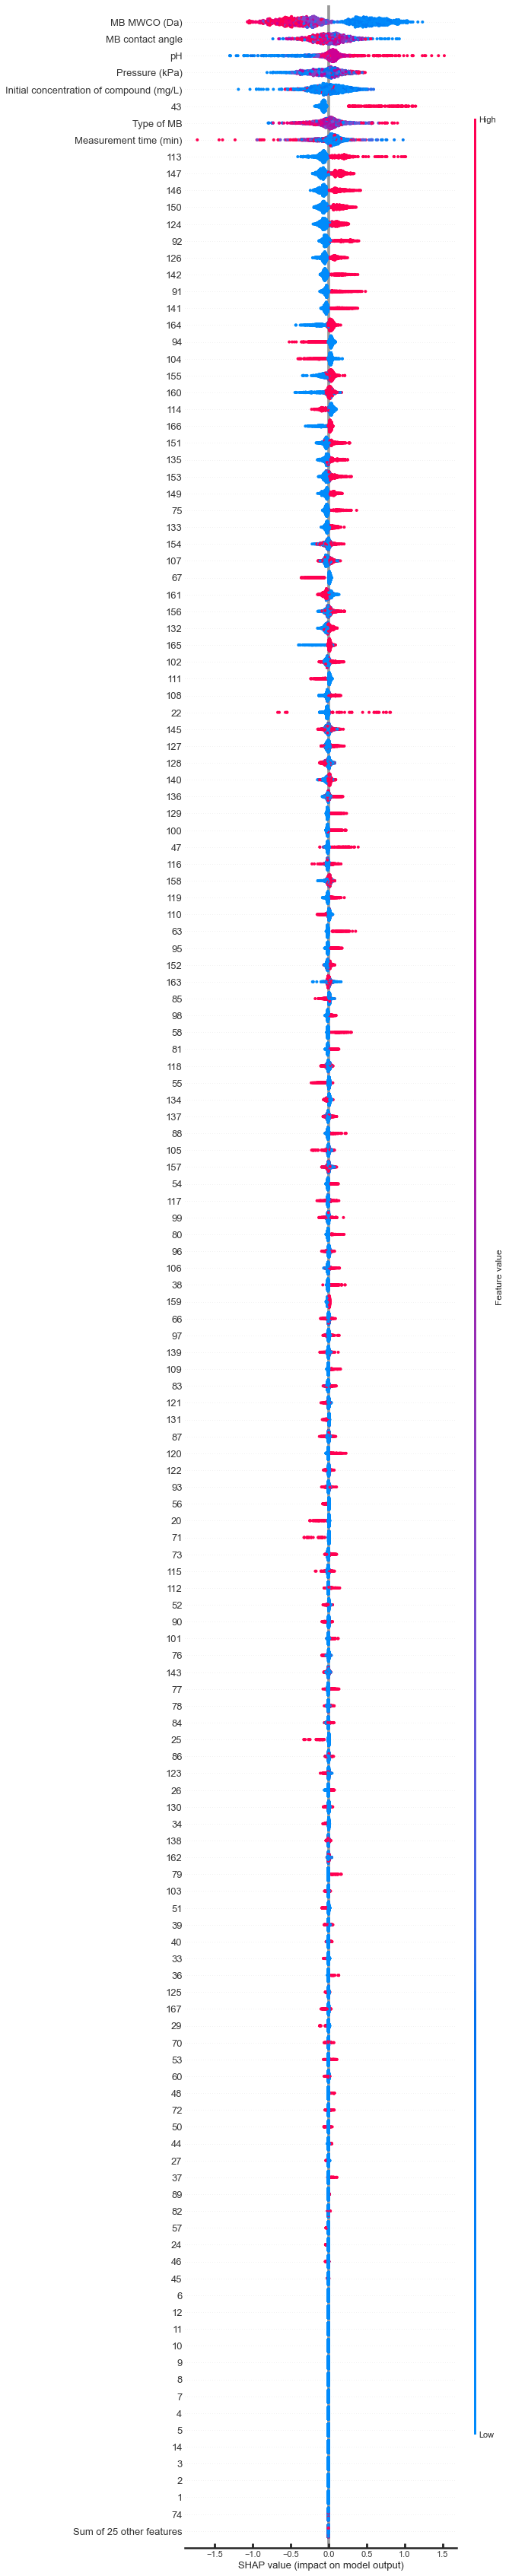

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=150, order=shap_values.abs.mean(0), show=False)
#plt.savefig('sqrt_shap_path_3.pdf', format='pdf', dpi=1000, bbox_inches='tight')

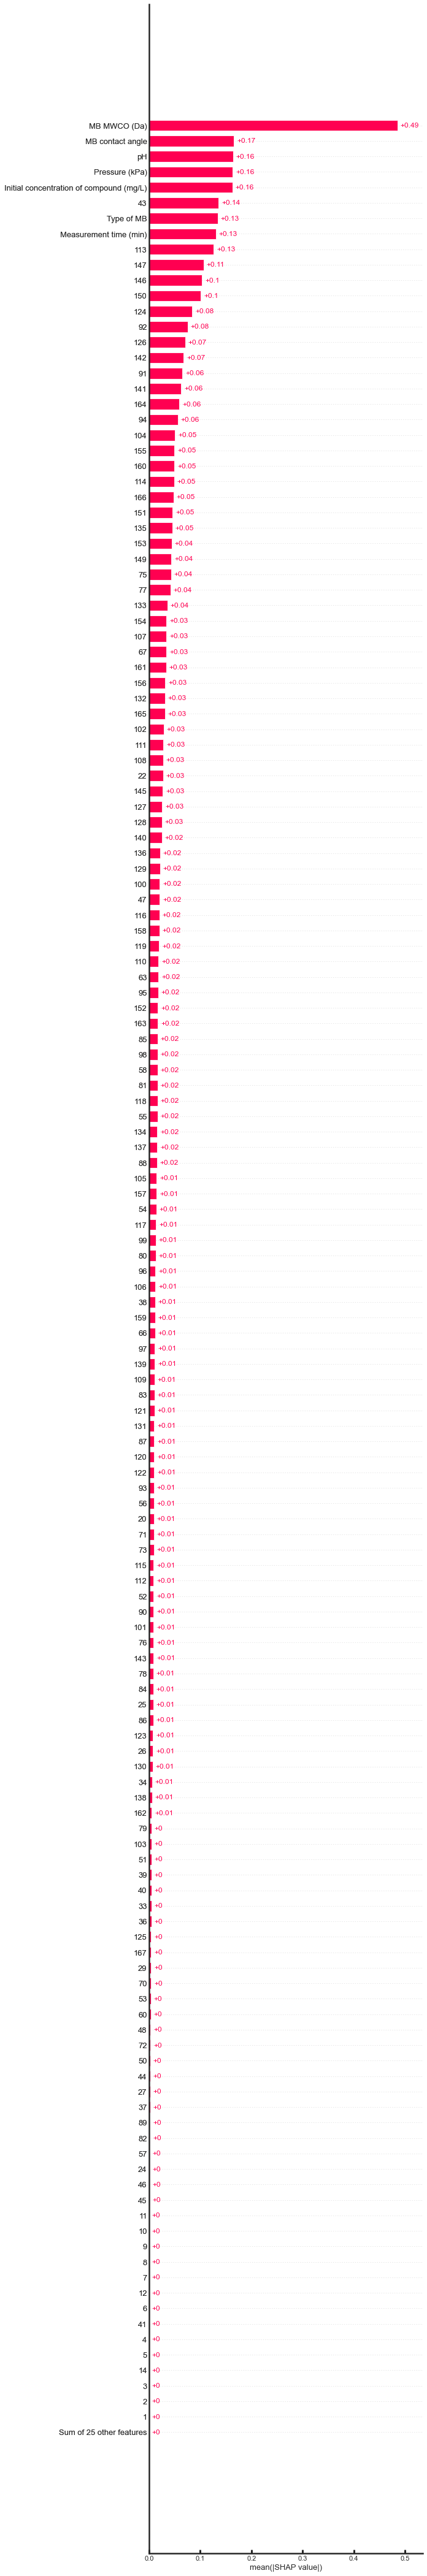

In [21]:
shap.plots.bar(shap_values, max_display=150)

In [118]:
shap_output = model.predict(xgtrain, pred_contribs=True)
shap_values = shap_output[:, :-1]
expected_value = shap_output[0, -1]
shap.summary_plot(shap_values)

In [21]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

0.001085678195760016
0.010172912154138777


0.0026162589523399354
0.011930629089777331


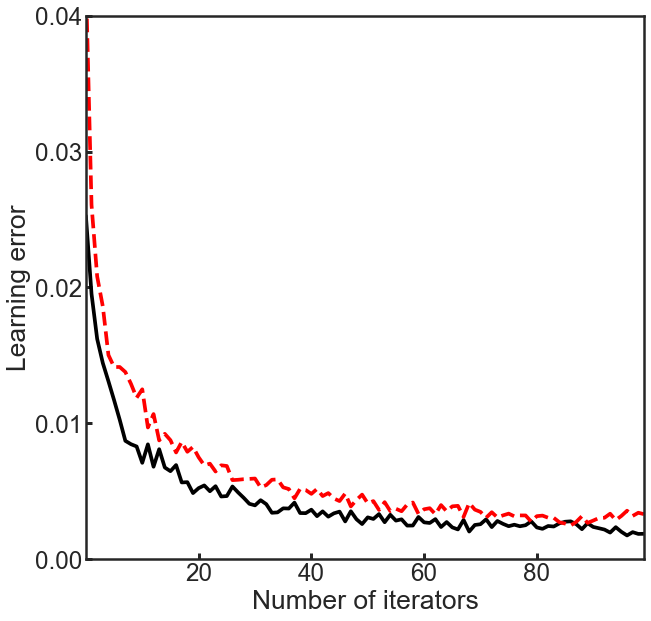

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


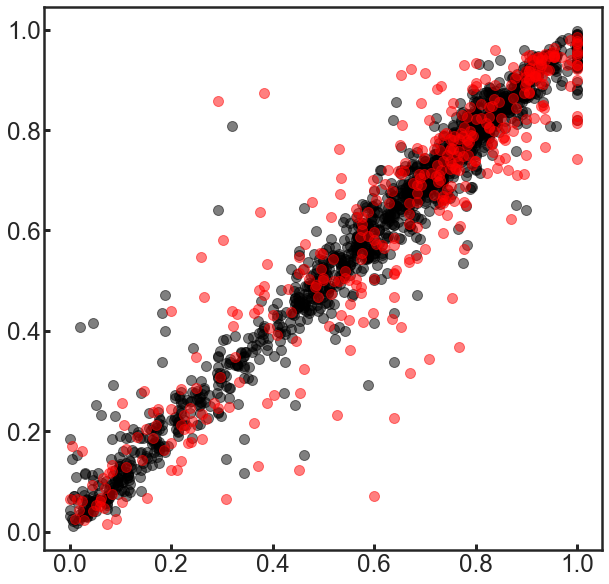

In [46]:
#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
# pred_train = model.predict(xgb.DMatrix(x_train, y_train))
# pred_test = model.predict(xgb.DMatrix(x_test, y_test))
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

fig = plt.figure(figsize=(10,10))
plt.plot(err_list, 'k-')
plt.plot(err_list_test, 'r--')
plt.xlabel('Number of iterators')
plt.ylabel('Learning error')
plt.xlim(0.01,99)
plt.ylim(0,0.04)
#plt.xticks(np.arange(0,99,20))
plt.yticks(np.arange(0,0.0401,0.01))
plt.show()
fig.savefig('sqrt_fig_0_path_3.pdf', bbox_i6nches='tight', transparent=True)

plt.figure(figsize=(10,10))
plt.scatter(y_train, pred_train, c='k', alpha=0.5, s=100)
plt.scatter(y_test, pred_test, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

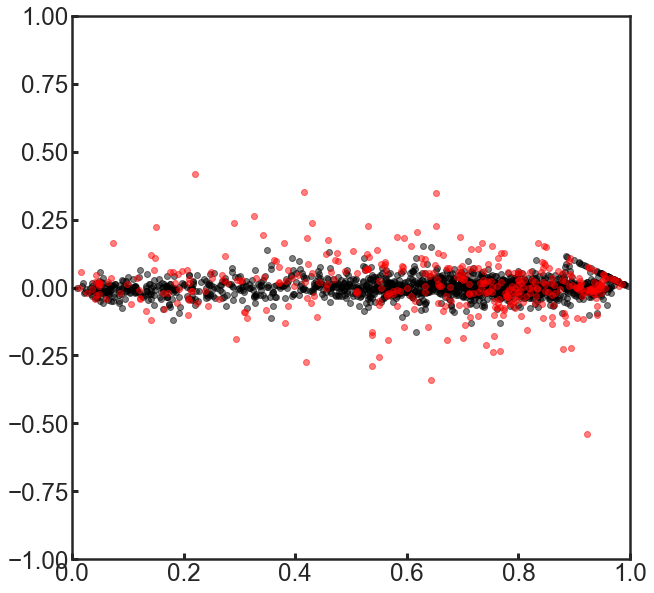

0.0010120640302584394
0.009279640857029002


In [91]:
plt.figure(figsize=(10,10))
plt.plot(pred_train, y_train-pred_train, 'ko', alpha=0.5)
plt.plot(pred_test, y_test-pred_test, 'ro', alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.show()

print(np.sum((y_train-pred_train)**2)/1524)
print(np.sum((y_test-pred_test)**2)/382)

In [47]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.751241229294651
0.8376002516581201


In [48]:
pred_train_inverse = scaler_removal.inverse_transform(pred_train.reshape(1,-1))
pred_test_inverse = scaler_removal.inverse_transform(pred_test.reshape(1,-1))
y_train_inverse = scaler_removal.inverse_transform(np.reshape(y_train, (1,-1)))
y_test_inverse = scaler_removal.inverse_transform(np.reshape(y_test, (1,-1)))

In [40]:
# #log
# pred_train_real_scale = (1-np.exp(-pred_train_inverse))*100
# pred_test_real_scale = (1-np.exp(-pred_test_inverse))*100
# y_train_real_scale = (1-np.exp(-y_train_inverse))*100
# y_test_real_scale = (1-np.exp(-y_test_inverse))*100

In [49]:
#sqrt
pred_train_real_scale = (1-(-pred_train_inverse)**2)*100
pred_test_real_scale = (1-(-pred_test_inverse)**2)*100
y_train_real_scale = (1-(-y_train_inverse)**2)*100
y_test_real_scale = (1-(-y_test_inverse)**2)*100

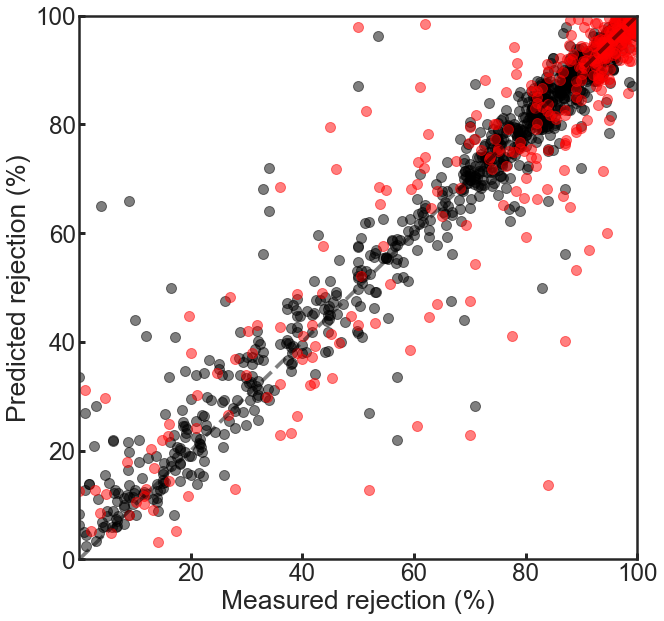

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [50]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

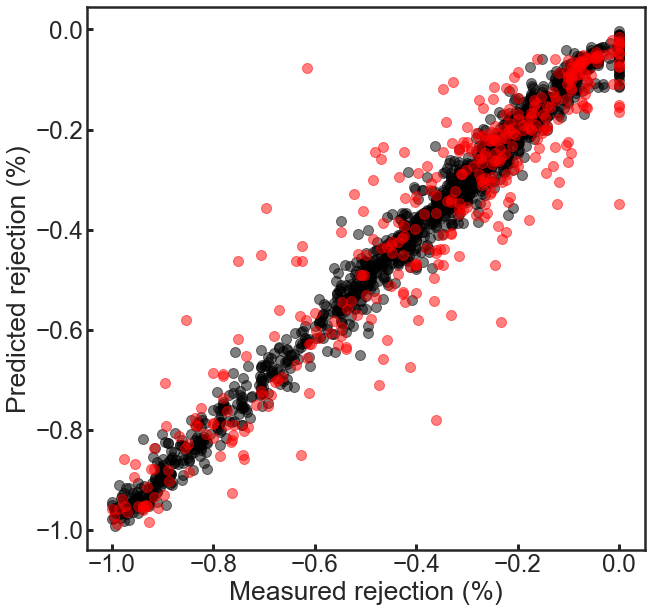

In [108]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train_inverse, pred_train_inverse, c='k', alpha=0.5, s=100)
plt.scatter(y_test_inverse, pred_test_inverse, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()

In [51]:
#tau, p_value = stats.kendalltau(y_test_real_scale, pred_test_real_scale)
print(stats.spearmanr(y_train_real_scale[0], pred_train_real_scale[0]))
print(stats.spearmanr(y_test_real_scale[0], pred_test_real_scale[0]))
print(r2_score(y_train_real_scale[0], pred_train_real_scale[0]))
print(r2_score(y_test_real_scale[0], pred_test_real_scale[0]))
print(mean_squared_error(y_train_real_scale, pred_train_real_scale, squared=False))
print(mean_squared_error(y_test_real_scale, pred_test_real_scale, squared=False))

SpearmanrResult(correlation=0.9789347093971613, pvalue=0.0)
SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.9573213977126478
0.8374637629327765
2.6002030463749337
6.026294380234923


In [57]:
tau, p_value = stats.kendalltau(y_test_inverse, pred_test_inverse)
print(stats.spearmanr(y_test_inverse[0], pred_test_inverse[0]))
print(tau)
print(r2_score(y_test_inverse[0], pred_test_inverse[0]))
print(mean_squared_error(y_test_inverse[0], pred_test_inverse[0], squared=False))

SpearmanrResult(correlation=0.9167640429791172, pvalue=1.5718797451721199e-153)
0.7639477705359597
0.8642933525965555
0.09984804292351211


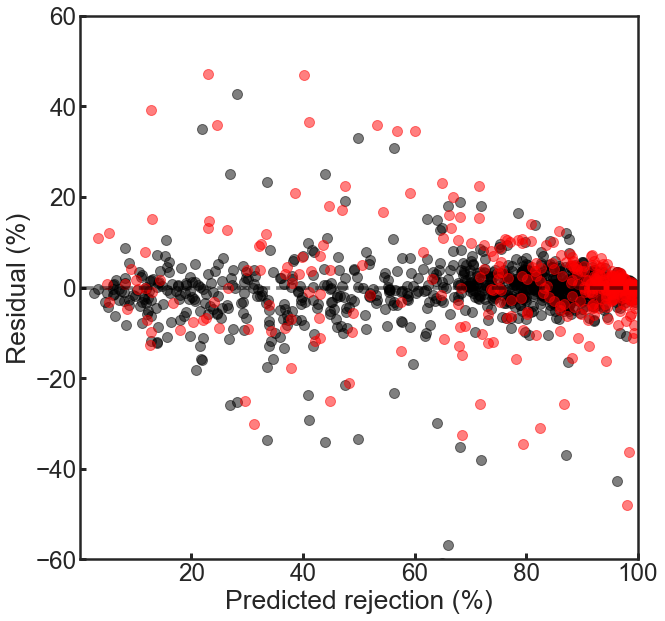

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [52]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.zeros(1001), 'k--', alpha=0.5)
plt.scatter(pred_train_real_scale, y_train_real_scale-pred_train_real_scale, c='k', s=100, alpha=0.5)
plt.scatter(pred_test_real_scale, y_test_real_scale-pred_test_real_scale, c='r', s=100, alpha=0.5)
plt.xlabel('Predicted rejection (%)')
plt.ylabel('Residual (%)')
plt.xlim(0.01,100)
plt.ylim(-60,60)
plt.show()
fig.savefig("sqrt_residual_path_3.pdf", bbox_i6nches='tight', transparent=True)

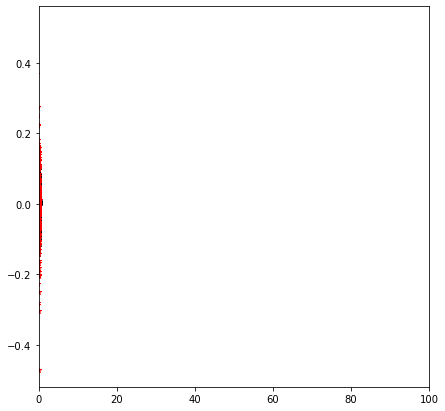

In [59]:
plt.figure(figsize=(7,7))
plt.plot(pred_train_inverse, y_train_inverse-pred_train_inverse, 'k^')
plt.plot(pred_test_inverse, y_test_inverse-pred_test_inverse, 'r*')
plt.xlim(0,100)
#plt.ylim(-1,1)
plt.show()

In [134]:
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=3)
# model_CA_1.fit(x_train, y_train)
pred_train = model_CA_1.predict(x_train)#, training=False)
pred_test = model_CA_1.predict(x_test)#, training=False)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))


# # Cross validation
# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_CA_1, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?


plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [16]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)

SpearmanrResult(correlation=0.8598106953003057, pvalue=5.647392399783467e-113)
0.693094346217264


In [29]:
explainer = shap.Explainer(model_CA_1)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0))
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0))
#shap.plots.bar(shap_values.abs.mean(0), max_display=20)
#shap.plots.beeswarm(shap_values.abs, color="shap_red", max_display=20)

NameError: name 'model_CA_1' is not defined

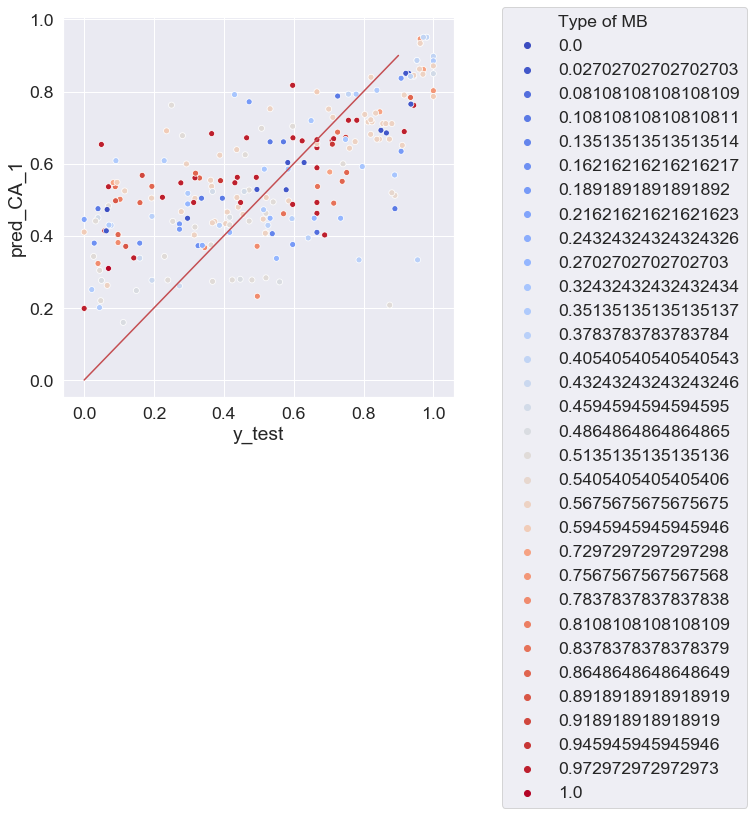

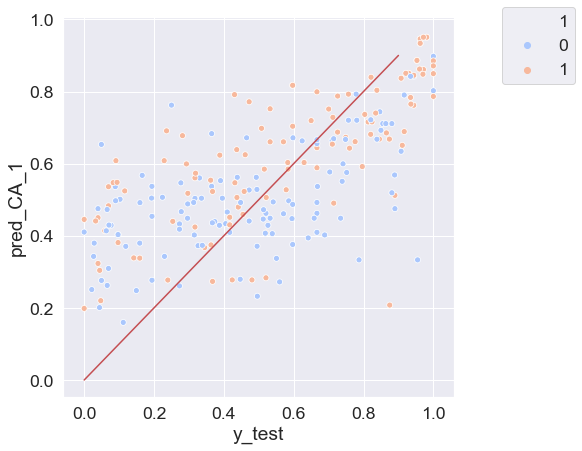

In [99]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['Type of MB'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['1'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [70]:
scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [19. 21. 27. 29. 31.]

In [27]:
scaler.inverse_transform(data_scaled)

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

temp_0 = scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

NameError: name 'scaler' is not defined

In [43]:
# XGBRegressor with Bayesian hyperparameter tuning
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

# # Original
# space={'max_depth': hp.choice('max_depth', np.arange(3, 50, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 20, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 10, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.1, 10, 0.1),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 200, 2000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.3, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 1, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 1, 0.1),
#       }

# # Short 1
# space={'max_depth': hp.choice('max_depth', np.arange(3, 10, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 5, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 1, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.01, 1, 0.01),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 0.5, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.1, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.5, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.5, 0.1),
#       }

# Short 2
space={'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }

kf = KFold(n_splits=6, shuffle=True, random_state=3)

def objective(space, cv=kf, X=x_train_scaled, y=y_train_scaled):
    clf = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                       reg_alpha = int(space['reg_alpha']), reg_lambda = int(space['reg_lambda']), min_child_weight=space['min_child_weight'],
                       colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'], subsample=space['subsample'],
                       colsample_bylevel=space['colsample_bylevel'], colsample_bynode=space['colsample_bynode'], random_state = 3)
    
    score = -cross_val_score(clf, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return score

trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, rstate=np.random.default_rng(3))
print(best_hyperparams)

TypeError: fmin() takes from 2 to 3 positional arguments but 0 were given

In [45]:
from hyperopt import fmin, tpe, hp
best = fmin(fn=lambda x: x ** 2,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)
print (best)

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 284.12trial/s, best loss: 0.0020289781259712858]
{'x': -0.04504417971249211}


In [47]:
space={'objective': 'reg:squarederror', 'tree_method':'gpu_hist', 'booster':'dart', 'one_drop':1, # reg:logistic
        'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }
# 'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),

def objective(space):
    model = None
    for i in range(100):
        x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train_scaled, y_train_scaled, test_size=0.5, random_state=i)

        for j in range(len(y_train_half)):
            if y_train_half[j]==np.amax(y_train):
                y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
        
        xgtrain = xgb.DMatrix(x_train_half, y_train_half)
        xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

        model = xgb.train(params=space, dtrain=xgtrain, num_boost_round=10, xgb_model=model)
        pred_train = model.predict(xgtrain)
        pred_test = model.predict(xgtest)
        train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    
    pred_test = model.predict(xgb.DMatrix(x_test_scaled, y_test_scaled))
    err = mean_squared_error(y_true=y_test_scaled, y_pred=pred_test)

    print ("SCORE:", err)
    return {'loss': err, 'status': STATUS_OK }

trials = Trials()

#best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 30, trials = trials, rstate=np.random.default_rng(3))
best_hyperparams = fmin(objective, space=space, algo=tpe.suggest, max_evals=100, trials = trials, rstate=np.random.default_rng(3))

SCORE:                                                                                                                 
0.06714306299103769                                                                                                    
SCORE:                                                                                                                 
0.07417236532629949                                                                                                    
SCORE:                                                                                                                 
0.07418294378234862                                                                                                    
SCORE:                                                                                                                 
0.07104950801393069                                                                                                    
SCORE:                                  

SCORE:                                                                                                                 
0.02481987036846582                                                                                                    
SCORE:                                                                                                                 
0.023012528238920246                                                                                                   
SCORE:                                                                                                                 
0.03089409959126911                                                                                                    
SCORE:                                                                                                                 
0.06690524278131553                                                                                                    
SCORE:                                  

In [48]:
best_hyperparams

{'colsample_bylevel': 0.30000000000000004,
 'colsample_bynode': 0.4,
 'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.088,
 'max_depth': 3,
 'min_child_weight': 4,
 'reg_alpha': 0.2,
 'reg_lambda': 1.3,
 'subsample': 1.0}

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_1024_1_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_short.txt', data, fmt='%s')

In [46]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_new.txt', data, fmt='%s')

In [36]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_short.txt', data, fmt='%s')

In [35]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_mem_class.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_2_new.txt', data, fmt='%s')

In [ ]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_4_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_32768_3_fin_b2.txt', data, fmt='%s')

In [47]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048.txt', data, fmt='%s')

In [79]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048_short_2.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6.txt', data, fmt='%s')

In [58]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_short.txt', data, fmt='%s')

In [22]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_new.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_7_short.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_short.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_1_new.txt', data, fmt='%s')

In [65]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_new.txt', data, fmt='%s')

In [68]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_fin.txt', data, fmt='%s')

In [91]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_16384_3_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_short.txt', data, fmt='%s')

In [154]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_fin_b2.txt', data, fmt='%s')

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166.txt', data, fmt='%s')

In [21]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_short.txt', data, fmt='%s')

In [131]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_fin_b2.txt', data, fmt='%s')

In [26]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_sqrt.txt', data, fmt='%s')

In [15]:
best_hyperparams = np.loadtxt("best_hyperparams_pubchem_881_short.txt", dtype=str)
best_hyperparams = dict(best_hyperparams)
for k, v in best_hyperparams.items():
    best_hyperparams[k] = float(v)

In [50]:
# XGBRegressor with Bayesian best parameters
model_B_best = XGBRegressor(objective = 'reg:squarederror', n_estimators = 1000, max_depth = int(best_hyperparams['max_depth']), 
                             gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
                             colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
                             subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
                             colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3, eval_metric = "rmse")

evaluation = [(x_train_scaled, y_train_scaled), (x_test_scaled, y_test_scaled)]
model_B_best.fit(x_train_scaled, y_train_scaled, eval_set = evaluation, verbose=3)#, early_stopping_rounds=10)
y_pred_train_best = model_B_best.predict(x_train_scaled)
y_pred_test_best = model_B_best.predict(x_test_scaled)
print(r2_score(y_train_scaled, y_pred_train_best))
print(r2_score(y_test_scaled, y_pred_test_best))
results = model_B_best.evals_result()


# # Cross validation
# model_B_best_cv = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
#                              gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
#                              colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
#                              subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
#                              colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_B_best_cv, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?

[0]	validation_0-rmse:0.28713	validation_1-rmse:0.29050
[3]	validation_0-rmse:0.26466	validation_1-rmse:0.26910
[6]	validation_0-rmse:0.24874	validation_1-rmse:0.25536
[9]	validation_0-rmse:0.23785	validation_1-rmse:0.24542
[12]	validation_0-rmse:0.22992	validation_1-rmse:0.23839
[15]	validation_0-rmse:0.22269	validation_1-rmse:0.23271
[18]	validation_0-rmse:0.21788	validation_1-rmse:0.22899
[21]	validation_0-rmse:0.21014	validation_1-rmse:0.22221
[24]	validation_0-rmse:0.20286	validation_1-rmse:0.21573
[27]	validation_0-rmse:0.19972	validation_1-rmse:0.21333
[30]	validation_0-rmse:0.19559	validation_1-rmse:0.20971
[33]	validation_0-rmse:0.19147	validation_1-rmse:0.20656
[36]	validation_0-rmse:0.18865	validation_1-rmse:0.20472
[39]	validation_0-rmse:0.18563	validation_1-rmse:0.20258
[42]	validation_0-rmse:0.18292	validation_1-rmse:0.20053
[45]	validation_0-rmse:0.18085	validation_1-rmse:0.19937
[48]	validation_0-rmse:0.17905	validation_1-rmse:0.19765
[51]	validation_0-rmse:0.17713	vali

[849]	validation_0-rmse:0.09379	validation_1-rmse:0.14244
[852]	validation_0-rmse:0.09373	validation_1-rmse:0.14239
[855]	validation_0-rmse:0.09364	validation_1-rmse:0.14234
[858]	validation_0-rmse:0.09351	validation_1-rmse:0.14223
[861]	validation_0-rmse:0.09344	validation_1-rmse:0.14227
[864]	validation_0-rmse:0.09328	validation_1-rmse:0.14231
[867]	validation_0-rmse:0.09322	validation_1-rmse:0.14227
[870]	validation_0-rmse:0.09316	validation_1-rmse:0.14223
[873]	validation_0-rmse:0.09301	validation_1-rmse:0.14217
[876]	validation_0-rmse:0.09297	validation_1-rmse:0.14215
[879]	validation_0-rmse:0.09284	validation_1-rmse:0.14212
[882]	validation_0-rmse:0.09279	validation_1-rmse:0.14203
[885]	validation_0-rmse:0.09267	validation_1-rmse:0.14197
[888]	validation_0-rmse:0.09259	validation_1-rmse:0.14194
[891]	validation_0-rmse:0.09251	validation_1-rmse:0.14195
[894]	validation_0-rmse:0.09243	validation_1-rmse:0.14193
[897]	validation_0-rmse:0.09240	validation_1-rmse:0.14192
[900]	validati

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0 0.07909072582215554


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1 0.06942003252158459


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2 0.06197004259482292


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


3 0.05584927047812061


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


4 0.05364238488207519


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


5 0.05196716817483707


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


6 0.04909461548439746


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


7 0.04656342174867482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


8 0.04416402077232772


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


9 0.0408126102864982


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10 0.04068193673344507


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


11 0.03912917538543679


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


12 0.041342234870180454


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


13 0.03824508014412136


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


14 0.03570654387537558


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


15 0.03693861832301049


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


16 0.03614018292427658


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


17 0.03511179270734234


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


18 0.03502446249159632


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


19 0.03314135543603559


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


20 0.03468345355210196


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


21 0.03277797192415655


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


22 0.03292485657027293


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


23 0.03122325186214785


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


24 0.03133046258823156


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


25 0.0321741830147403


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


26 0.0304784363611974


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


27 0.03110680667644285


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


28 0.029335456950091467


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


29 0.029241074569905816


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


30 0.030419826560207048


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


31 0.0289584318259517


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


32 0.029583834462786965


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


33 0.026673984772819542


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


34 0.02787036917863119


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


35 0.02916900672433983


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


36 0.02881765445347561


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


37 0.02887889951291818


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


38 0.027231164485973354


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


39 0.029863415944145193


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


40 0.026220359677092697


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


41 0.02827276892571639


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


42 0.02626559426944456


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


43 0.026752581212957278


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


44 0.029747697322867667


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


45 0.027267267178639386


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


46 0.02734327110698516


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


47 0.02396235533266683


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


48 0.0265986260503544


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


49 0.027233813514639396


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


50 0.025738371051851113


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


51 0.024549239872023815


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


52 0.026367579493002155


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


53 0.026416635004977325


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


54 0.02562090973137543


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


55 0.026497960174232005


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


56 0.026062354308846312


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


57 0.026235267880405755


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


58 0.024013411819092615


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


59 0.023972916930745828


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


60 0.02463368723490087


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


61 0.02618814042637427


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


62 0.024759004031920617


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


63 0.024177108787615635


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


64 0.023708245215794566


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


65 0.025476700544212482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


66 0.024998165959791964


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


67 0.022630715571054148


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


68 0.023203819286006618


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


69 0.02587523012586036


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


70 0.023698113086757705


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


71 0.024660723522509177


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


72 0.02354452761199006


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


73 0.02395301330032377


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


74 0.024277601600808583


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


75 0.02301429106755219


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


76 0.02519037380191064


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


77 0.023146764218877992


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


78 0.022592496228910353


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


79 0.022108782329191765


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


80 0.02377080660777819


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


81 0.023081477436021684


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


82 0.024229366103353803


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


83 0.02235302003286453


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


84 0.02345889952396978


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


85 0.023427287605369246


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


86 0.022702390034202703


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


87 0.022695289701774028


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


88 0.023135673265520372


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


89 0.023477918350995896


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


90 0.022825040730039797


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


91 0.022980110473438908


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


92 0.023066157572348037


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


93 0.023911572565836817


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


94 0.021363786527115344


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


95 0.02217292967207237


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


96 0.022196748075556796


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


97 0.023098833993425476


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


98 0.022053383324729548


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


99 0.021506508671965775
0.024054683872899236


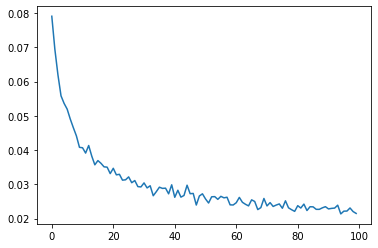

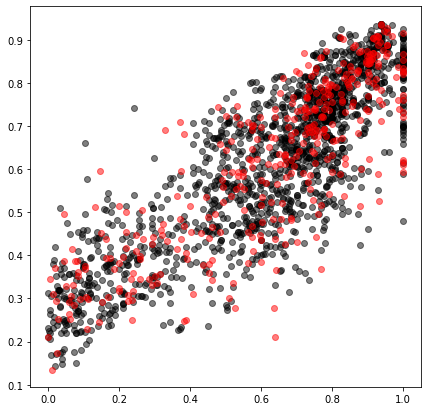

In [23]:
params = {"objective":"reg:logistic", 'tree_method':'gpu_hist',
         'max_depth' : int(best_hyperparams['max_depth']), 
         'gamma' : best_hyperparams['gamma'],
         'reg_alpha' : int(best_hyperparams['reg_alpha']), 
         'reg_lambda' : int(best_hyperparams['reg_lambda']), 
          'min_child_weight' : best_hyperparams['min_child_weight'],
          'colsample_bytree' : best_hyperparams['colsample_bytree'], 
          'learning_rate' : best_hyperparams['learning_rate'], 
          'subsample' : best_hyperparams['subsample'], 
          'colsample_bylevel' : best_hyperparams['colsample_bylevel'], 
          'colsample_bynode' : best_hyperparams['colsample_bynode'], 
          'random_state' : 3}

err_list = []
res = {}
model = None

for i in range(100):
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=10, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, mean_squared_error(y_true=y_test_dummy, y_pred=pred_test))
    err_list.append(train_err)

plt.plot(err_list)

#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
pred_train = model.predict(xgb.DMatrix(x_train, y_train))
pred_test = model.predict(xgb.DMatrix(x_test, y_test))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))
plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

In [24]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.8232717523657794, pvalue=1.7602797776936417e-95)
0.6331124307594824
0.6725675923703349


(array([ 2.,  1.,  3.,  1.,  5.,  1.,  1.,  0.,  1.,  3.,  0.,  7.,  2.,
         3.,  3.,  1.,  3.,  2.,  1.,  1.,  3.,  3.,  5.,  3.,  1.,  1.,
         2.,  2.,  2.,  1.,  4.,  4.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,
         2.,  2.,  2.,  0.,  5.,  2.,  2.,  1.,  3.,  2.,  2.,  3.,  4.,
         2.,  2.,  5.,  5.,  4.,  1.,  5.,  5.,  6.,  3.,  3.,  3.,  9.,
         2.,  4.,  5.,  6.,  5.,  3.,  7., 10.,  3.,  5., 13.,  8., 11.,
         7., 12.,  4.,  3.,  7.,  5.,  5.,  4.,  5.,  8., 11.,  6.,  3.,
        11.,  4.,  8.,  5.,  8., 12.,  3.,  0.,  4.]),
 array([0.00813247, 0.0179085 , 0.02768452, 0.03746055, 0.04723658,
        0.05701261, 0.06678864, 0.07656467, 0.0863407 , 0.09611673,
        0.10589276, 0.11566879, 0.12544481, 0.13522084, 0.14499687,
        0.15477291, 0.16454893, 0.17432496, 0.18410099, 0.19387701,
        0.20365304, 0.21342908, 0.2232051 , 0.23298113, 0.24275716,
        0.2525332 , 0.26230922, 0.27208525, 0.28186128, 0.2916373 ,
        0.30141333, 0.3111

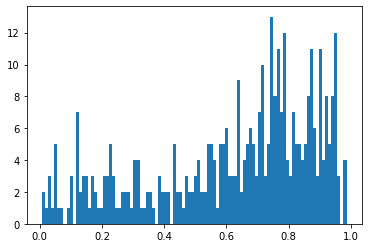

In [29]:
plt.hist(pred_test, bins = 100)

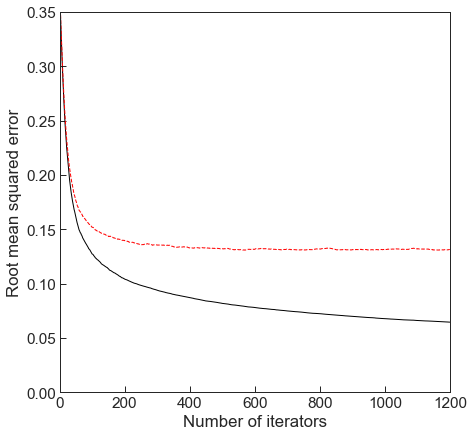

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


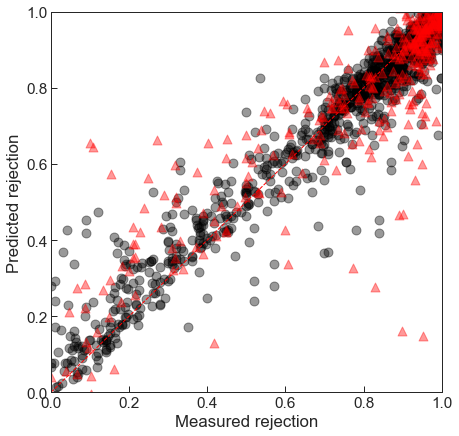

meta NOT subset; don't know how to subset; dropped


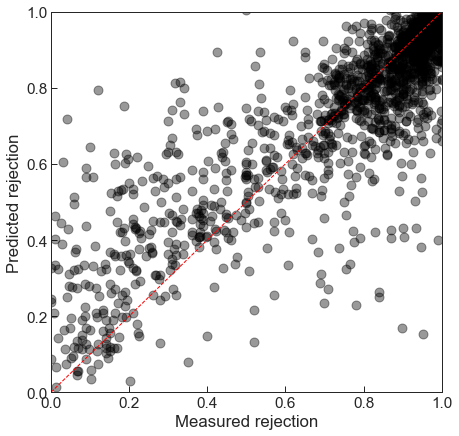

meta NOT subset; don't know how to subset; dropped


In [23]:
fig = plt.figure(figsize=(7,7))
#plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k-') #train
plt.plot(results['validation_1']['rmse'], 'r--') #test
plt.xlabel('Number of iterators')
plt.ylabel('Root mean squared error')
plt.xlim(0, 1200)
plt.ylim(0, 0.35)
plt.xticks(np.arange(0,1201,200))
plt.show()
fig.savefig("fig_0_path_3_fin_b2.pdf", bbox_i6nches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))
plt.scatter(y_train, y_pred_train_best, c='k', alpha=0.4, s=80, edgecolors=None)
plt.scatter(y_test, y_pred_test_best, c='r', marker='^', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r--')
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_1_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))        
plt.scatter(y_data_scaled, old, c='k', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r--')
#plt.plot([y_data_scaled.min(), y_data_scaled.max()], [y_data_scaled.min(), y_data_scaled.max()], 'k--', lw=2)
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_2_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

# fig = plt.figure(figsize=(7,7))
# plt.scatter(y_pred_test_best, y_test - y_pred_test_best)
# plt.show()

In [ ]:
# save the model
filename = 'Model_RDkit_2048.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [81]:
# save the model
filename = 'Model_RDkit_2048_short_2.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_Morgan_2048_6.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [60]:
# save the model
filename = 'Model_Morgan_2048_6_morgan.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [49]:
# save the model
filename = 'Model_MACCS.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [52]:
# save the model
filename = 'Model_MACCS_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

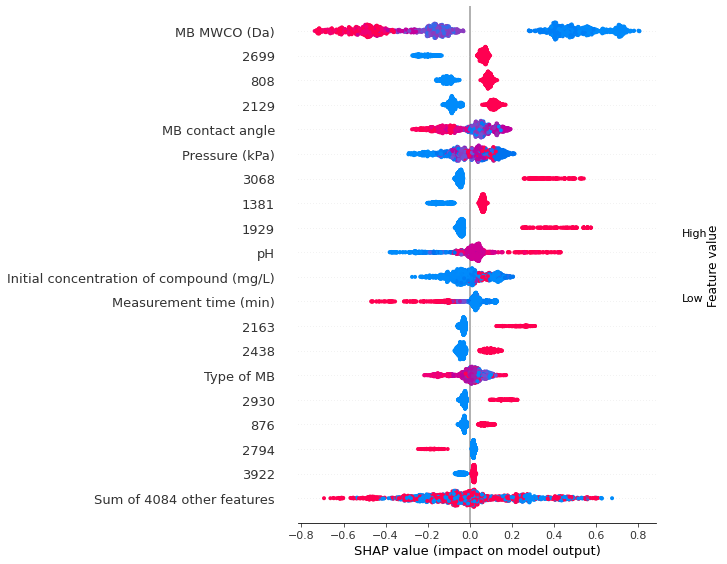

In [25]:
#explainer = shap.Explainer(model_B_best)
explainer = shap.Explainer(model)
shap_values = explainer(x_train, check_additivity=False)
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0), show=False)#, color=plt.get_cmap("cool"))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0), show=False)#, color=plt.get_cmap("cool"))
#shap.summary_plot(shap_values, x_train)
#plt.savefig("shap_path_3_fin_b2.pdf", format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig("shap_morgan.png", format='png', dpi=1000, bbox_inches='tight')

In [49]:
shap.initjs()

In [76]:
shap_values_2 = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values_2[0:5,:], x_train.iloc[0:5,:])

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.041591, while the model output was 0.320452. If this difference is acceptable you can set check_additivity=False to disable this check.

meta NOT subset; don't know how to subset; dropped


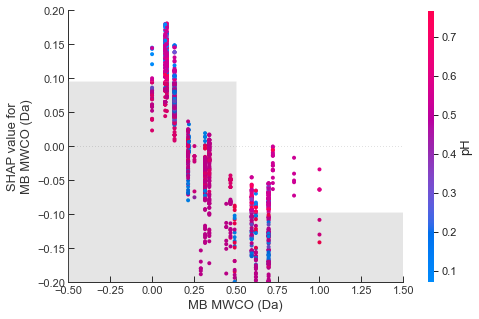

In [21]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html
shap.plots.scatter(shap_values[:,"MB MWCO (Da)"], color=shap_values[:,"pH"], xmin=0, xmax=1.25, ymin=-0.2, ymax=0.2, show=False) #cmap=plt.get_cmap("cool")
plt.savefig("shap_dependence_morgan_2_short.pdf", format='pdf', dpi=1000, bbox_inches='tight')

In [180]:
np.sum(shap_values.abs.max(0).values[3:23])/20

0.0038596674799919128

In [15]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# load the model
loaded_model = pickle.load(open('Model_RDkit_2048_short_2.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.6953144634628119
